In [46]:
from utils.data_generated import *
import networkx as nx
import numpy as np
from sklearn.cluster import OPTICS





In [2]:
#load panda dataframes for movies, poeple, and cluster
movies = load_movie_metadata()
people = load_people()
cluster = load_cluster_optics()
ethnicities = load_ethnicities()

In [3]:
movies.head(1)

,index,movie_id_wikipedia,movie_id_freebase,title_id_imdb,movie_name,release_date,box_office_revenue,runtime,languages,countries,is_adult,genres_cmu,genres_imdb
0,0,975900,/m/03vyhn,tt0228333,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],0,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]"


In [4]:
people.head(1)

,index,person_name_id,person_name,birth_year,death_year,primary_profession,known_for_titles,gender,heigth,ethnicity
0,0,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0038355, tt0037382, tt0117057, tt0071877]",F,1.727,/m/048z7l


In [5]:
#count number of NaN values in ethnicites
ethnicities

,freebase_id,ethnicity
0,/m/0x67,African Americans
1,/m/064b9n,Omaha people
2,/m/041rx,Jewish people
3,/m/033tf_,Irish Americans
4,/m/04gfy7,Indian Americans
...,...,...
474,/m/043_z22,NaN
475,/m/04jtjvt,NaN
476,/m/04kdwcx,NaN
477,/m/04_8lfc,NaN


In [6]:
#transfomr dict cluster into dataframe, index is the cluster key and the corresponding value is the cluster value, with columns names person_name_id and cluster_id
cluster_df = pd.DataFrame.from_dict(cluster, orient='index', columns=['cluster_id'])
#name the index column
cluster_df.index.name = 'person_name_id'

#print number of clusters
print("Number of clusters: ", len(cluster_df.cluster_id.unique()))

Number of clusters:  6


There are a total of 6 clusters, 1 is the clusters of the outliers (with value -1).

In [7]:
#create panda dataframe on all custer_id == i, take corresponding person from people matching on person_name_id 
cluster1 = cluster_df[cluster_df['cluster_id'] == 0].join(people.set_index('person_name_id'))
cluster2 = cluster_df[cluster_df['cluster_id'] == 1].join(people.set_index('person_name_id'))
cluster3 = cluster_df[cluster_df['cluster_id'] == 2].join(people.set_index('person_name_id'))
cluster4 = cluster_df[cluster_df['cluster_id'] == 3].join(people.set_index('person_name_id'))
cluster5 = cluster_df[cluster_df['cluster_id'] == 4].join(people.set_index('person_name_id'))
cluster_outlier = cluster_df[cluster_df['cluster_id'] == -1].join(people.set_index('person_name_id'))


In [8]:
#print the number of people in each cluster
print('number of people in cluster 1: ', len(cluster1))
print('number of people in cluster 2: ', len(cluster2))
print('number of people in cluster 3: ', len(cluster3))
print('number of people in cluster 4: ', len(cluster4))
print('number of people in cluster 5: ', len(cluster5))
print('number of people in cluster outlier: ', len(cluster_outlier))

number of people in cluster 1:  25417
number of people in cluster 2:  2324
number of people in cluster 3:  1219
number of people in cluster 4:  1140
number of people in cluster 5:  3341
number of people in cluster outlier:  38299


In [9]:
#get all titles of movies in cluster 1 from columns known_for_titles. each entry is a list of titles. save all titles in a list, removing duplicates
def get_titles(cluster):
    titles_cluster = set()
    for i in range(len(cluster)):
        if type(cluster.iloc[i].known_for_titles) == list:
            for title in cluster.iloc[i].known_for_titles:
                titles_cluster.add(title)

    #make it a dataframe
    return pd.DataFrame(list(titles_cluster), columns=['title'])


In [10]:
titles_cluster1 = get_titles(cluster1)
titles_cluster2 = get_titles(cluster2)
titles_cluster3 = get_titles(cluster3)
titles_cluster4 = get_titles(cluster4)
titles_cluster5 = get_titles(cluster5)

In [11]:
#keep only movies that are in the cluster 1
movies_cluster1 = movies[movies['title_id_imdb'].isin(titles_cluster1['title'])]
movies_cluster2 = movies[movies['title_id_imdb'].isin(titles_cluster2['title'])]
movies_cluster3 = movies[movies['title_id_imdb'].isin(titles_cluster3['title'])]
movies_cluster4 = movies[movies['title_id_imdb'].isin(titles_cluster4['title'])]
movies_cluster5 = movies[movies['title_id_imdb'].isin(titles_cluster5['title'])]


In [12]:
movies_cluster1

,index,movie_id_wikipedia,movie_id_freebase,title_id_imdb,movie_name,release_date,box_office_revenue,runtime,languages,countries,is_adult,genres_cmu,genres_imdb
0,0,975900,/m/03vyhn,tt0228333,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],0,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]"
3,38,156558,/m/014k4y,tt0255819,Baby Boy,2001-06-27,29381649.0,123.0,[English Language],[United States of America],0,"[Crime Fiction, Drama, Coming of age]","[Crime, Drama, Romance]"
4,52,26067101,/m/0b6c_nw,tt0178022,Siam Sunset,1999-01-01,NaN,91.0,[],"[Australia, New Zealand]",0,"[Romantic comedy, Romance Film, Comedy, World ...","[Adventure, Comedy, Romance]"
7,59,12008535,/m/02vlsqt,tt0405393,Rudo y Cursi,2008-01-01,11091868.0,103.0,[Spanish Language],"[Mexico, United States of America]",0,"[Sports, Drama, Family Drama, Comedy-drama, Co...","[Comedy, Drama, Sport]"
9,152,21449578,/m/05f6kpj,tt0116480,Hamsun,1996-04-19,NaN,160.0,"[English Language, Swedish Language, German La...","[Germany, Denmark, Sweden, Norway]",0,"[War film, Drama, Political drama, World cinem...","[Biography, Drama, War]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,273807,23252456,/m/065yr3p,tt0362048,Malabar Princess,2004-03-03,NaN,94.0,[French Language],[France],0,[Drama],[Drama]
14790,273812,30553937,/m/0g9ts5h,tt0123726,Confessions of a Sexist Pig,1998-03-07,NaN,91.0,[English Language],[United States of America],0,"[Romantic comedy, Comedy]",[Comedy]
14793,273820,1191380,/m/04f_y7,tt0120514,Wilde,1997-01-01,2158775.0,118.0,[English Language],"[Kingdom of Great Britain, Japan, England, Uni...",0,"[LGBT, Biography, Japanese Movies, History, Ga...","[Biography, Drama, Romance]"
14796,273983,25919941,/m/0b6lqy1,tt1172063,The Kreutzer Sonata,2008-01-01,NaN,99.0,[],[United States of America],0,"[Romantic drama, Romance Film, Drama, Film ada...",[Drama]


In [13]:
#add column to ethnicites with name occurences
def get_ethnicities(cluster):
	e = ethnicities.copy()
	e['occurences'] = 0
	for ethnicity in people['ethnicity'].unique():
		#count occurence of ethnicit in cluster1
		count = len(cluster[cluster['ethnicity'] == ethnicity])
		e.loc[e['freebase_id'] == ethnicity, 'occurences'] = count
	e.drop(['freebase_id'], axis=1, inplace=True)
	#e.dropna(inplace=True)
	e.drop(e[e['occurences'] == 0].index, inplace=True)
	e.sort_values(by=['occurences'], ascending=False, inplace=True)
	return e


In [14]:
ethnicities1 = get_ethnicities(cluster1)
ethnicities2 = get_ethnicities(cluster2)
ethnicities3 = get_ethnicities(cluster3)
ethnicities4 = get_ethnicities(cluster4)
ethnicities5 = get_ethnicities(cluster5)	

In [15]:
#count occurences of each profession in lists in column primary_profession for all people in cluster1
def get_professions(cluster):
	professions = {}
	for i in range(len(cluster)):
		if type(cluster.iloc[i].primary_profession) == list:
			for profession in cluster.iloc[i].primary_profession:
				if profession in professions:
					professions[profession] += 1
				else:
					professions[profession] = 1
	#return dataframe with two columns, profession and occurences
	return pd.DataFrame.from_dict(professions, orient='index', columns=['occurences']).sort_values(by=['occurences'], ascending=False)


In [16]:
prof1 = get_professions(cluster1)
prof2 = get_professions(cluster2)
prof3 = get_professions(cluster3)
prof4 = get_professions(cluster4)
prof5 = get_professions(cluster5)

In [17]:
def get_cmu_genres(cluster):
	genres = {}
	for i in range(len(cluster)):
		if type(cluster.iloc[i].genres_cmu) == list:
			for genre in cluster.iloc[i].genres_cmu:
				if genre in genres:
					genres[genre] += 1
				else:
					genres[genre] = 1
	#return dataframe with two columns, profession and occurences
	return pd.DataFrame.from_dict(genres, orient='index', columns=['occurences']).sort_values(by=['occurences'], ascending=False)

In [18]:
cmu_genres1 = get_cmu_genres(movies_cluster1)
cmu_genres2 = get_cmu_genres(movies_cluster2)
cmu_genres3 = get_cmu_genres(movies_cluster3)
cmu_genres4 = get_cmu_genres(movies_cluster4)
cmu_genres5 = get_cmu_genres(movies_cluster5)

In [19]:
def get_imdb_genres(cluster):
	genres = {}
	for i in range(len(cluster)):
		if type(cluster.iloc[i].genres_imdb) == list:
			for genre in cluster.iloc[i].genres_imdb:
				if genre in genres:
					genres[genre] += 1
				else:
					genres[genre] = 1
	#return dataframe with two columns, profession and occurences
	return pd.DataFrame.from_dict(genres, orient='index', columns=['occurences']).sort_values(by=['occurences'], ascending=False)

In [20]:
imdb_genres1 = get_imdb_genres(movies_cluster1)
imdb_genres2 = get_imdb_genres(movies_cluster2)
imdb_genres3 = get_imdb_genres(movies_cluster3)
imdb_genres4 = get_imdb_genres(movies_cluster4)
imdb_genres5 = get_imdb_genres(movies_cluster5)

In [21]:
def plot_imdb_genres(*args):
    for (imdbs, id) in args:
        #print(eth, id)
        imdb = imdbs.copy()
        imdb = imdb[imdb['occurences'] > 0]
        #keep only 10 most occuring, drop the rest
        num = imdb.shape[0]
        if num > 30:
            num = 30
        imdb = imdb[:num]
        #get name of variable eth
        y = imdb['occurences']
        
        title = '{} most represented imdb genres in cluster {}'.format(num, id)
        imdb.plot.bar( y='occurences', rot=90, figsize=(20,10), title=title)

In [22]:

def plot_cmu_genres(*args):
    for (cmus, id) in args:
        #print(eth, id)
        cmu = cmus.copy()
        cmu = cmu[cmu['occurences'] > 0]
        #keep only 10 most occuring, drop the rest
        num = cmu.shape[0]
        if num > 30:
            num = 30
        cmu = cmu[:num]
        #get name of variable eth
        y = cmu['occurences']
        
        title = '{} most represented cmu genres in cluster {}'.format(num, id)
        cmu.plot.bar( y='occurences', rot=90, figsize=(20,10), title=title)

In [23]:
#plot ethnicities 1 ditribution
def plot_eth(*args):
    for (eth, id) in args:
        #print(eth, id)
        eth = eth.copy()
        eth = eth[eth['occurences'] > 0]
        #keep only 10 most occuring, drop the rest
        num = eth.shape[0]
        if num > 20:
            num = 20
        eth = eth[:num]
        #get name of variable eth
        x = eth['ethnicity']
        y = eth['occurences']
        
        title = '{} most represneted ethnicities in cluster {}'.format(num, id)
        eth.plot.bar(x='ethnicity', y='occurences', rot=90, figsize=(20,10), title=title)



    
 

In [24]:
def plot_prof(*args):
	for (prof, id) in args:
		prof = prof.copy()
		prof = prof[prof['occurences'] > 0]
		num = prof.shape[0]
		# if num > 20:
		# 	num = 20
		prof = prof[:num]

		y = prof['occurences']
		
		title = '{} most represneted professions in cluster {}'.format(num, id)
		prof.plot.bar(y='occurences', rot=90, figsize=(20,10), title=title)

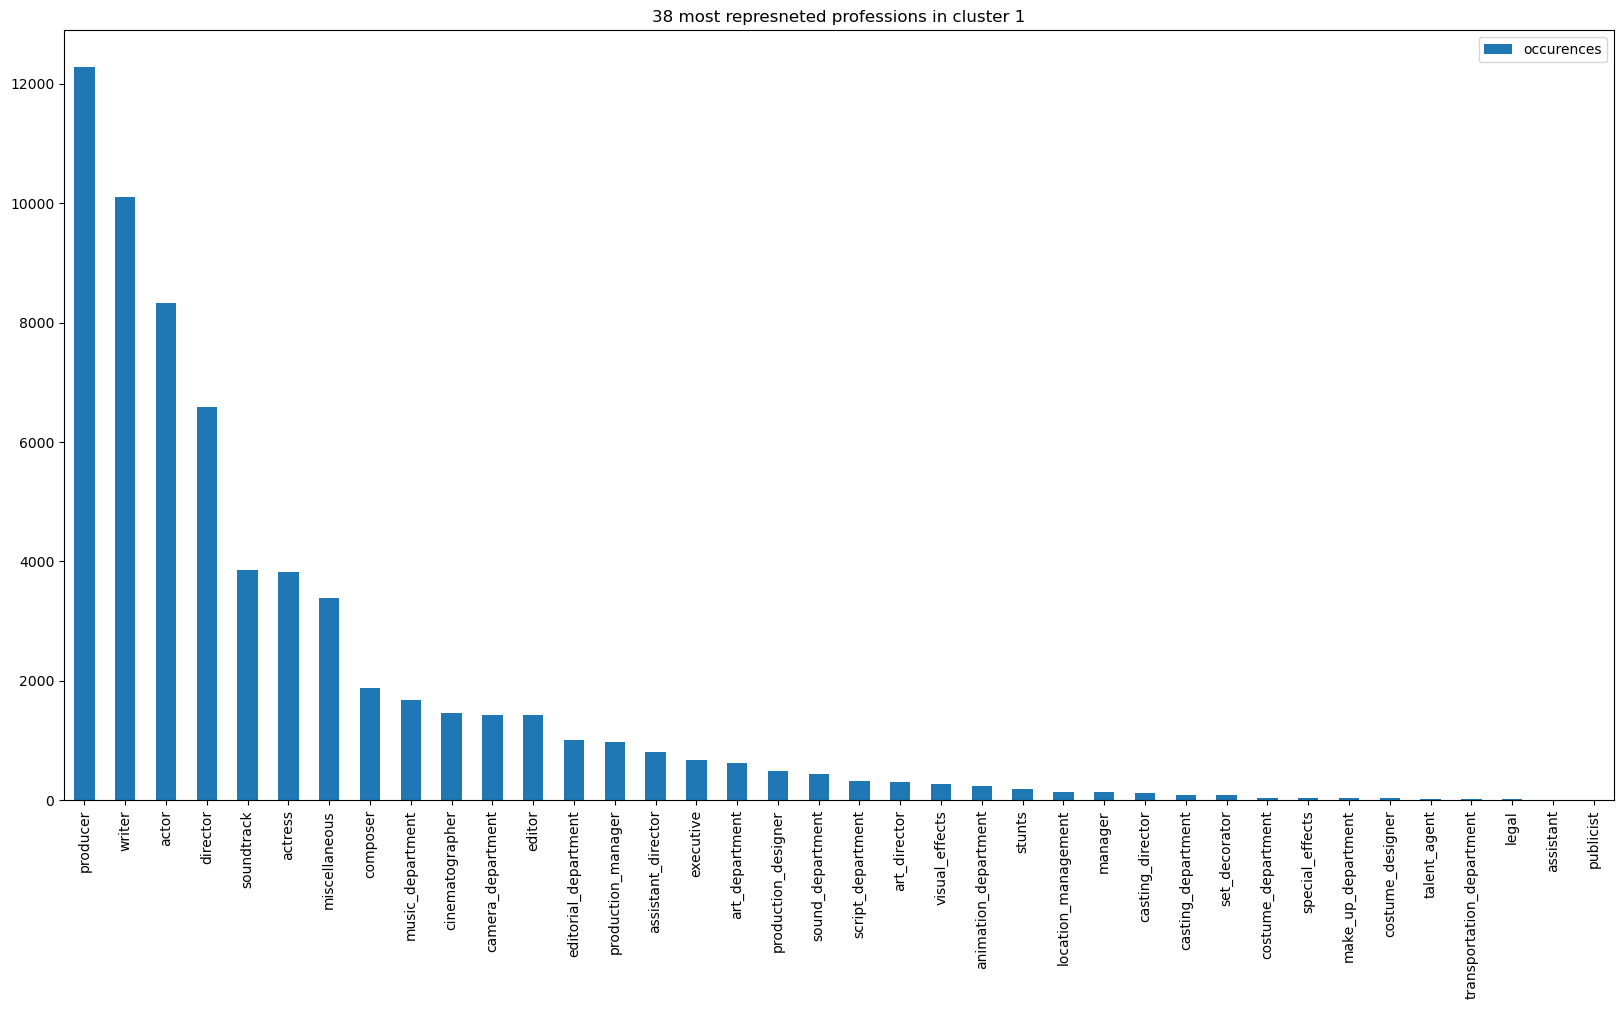

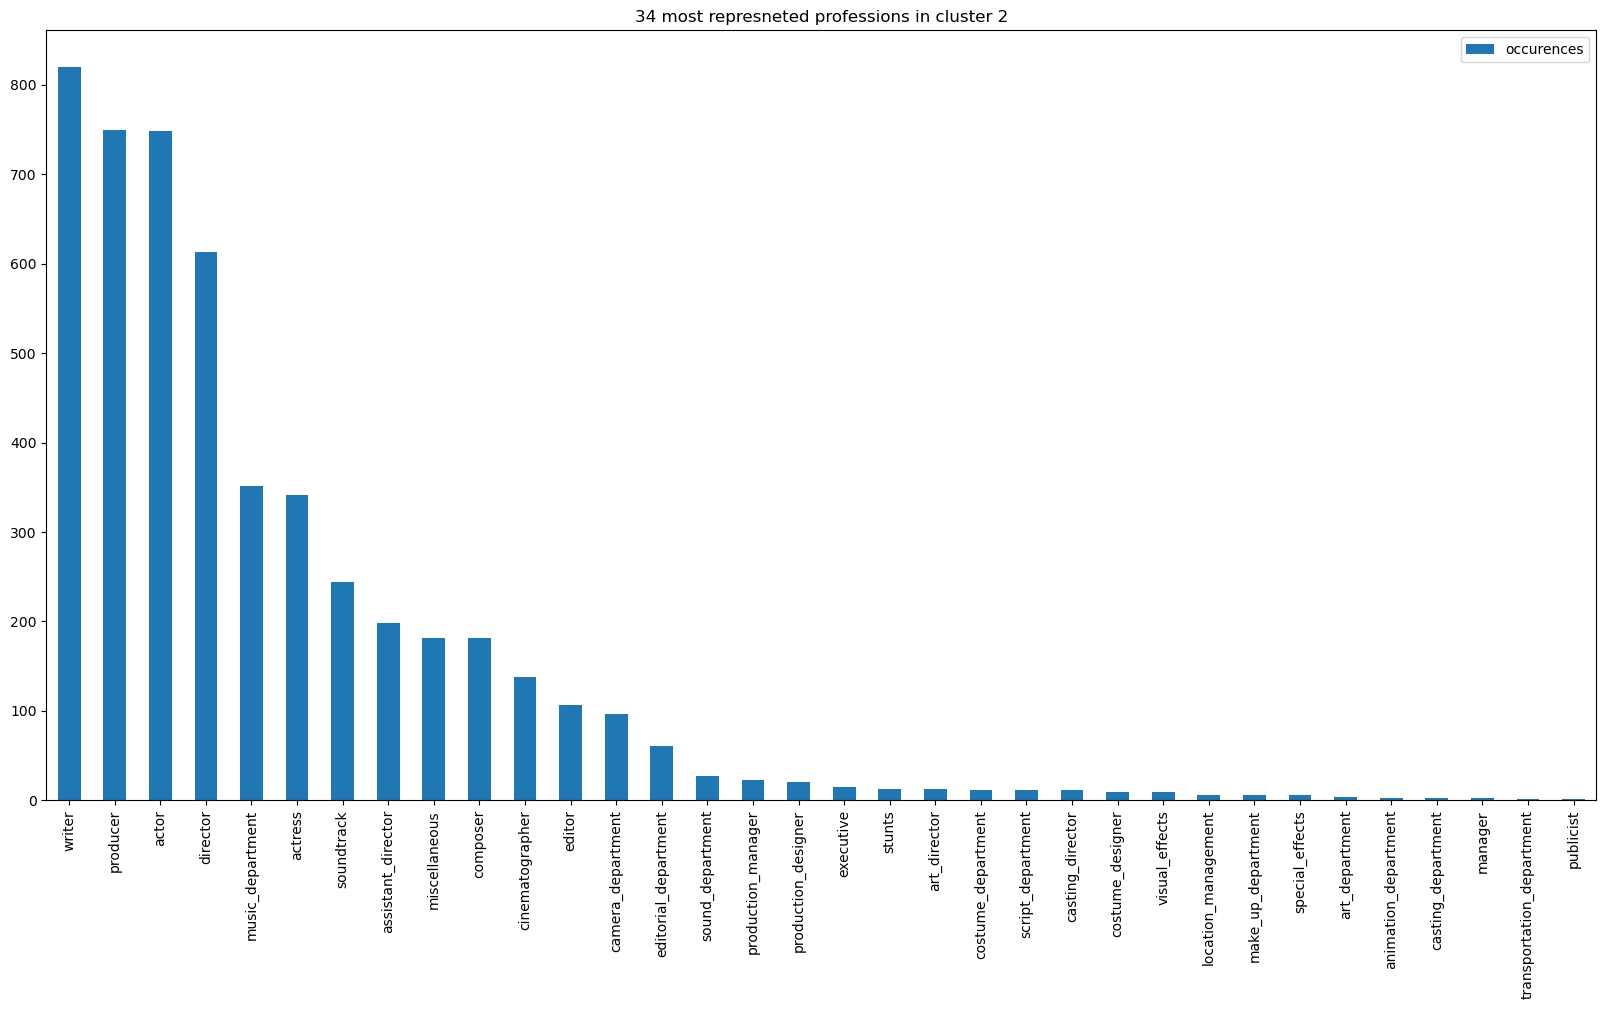

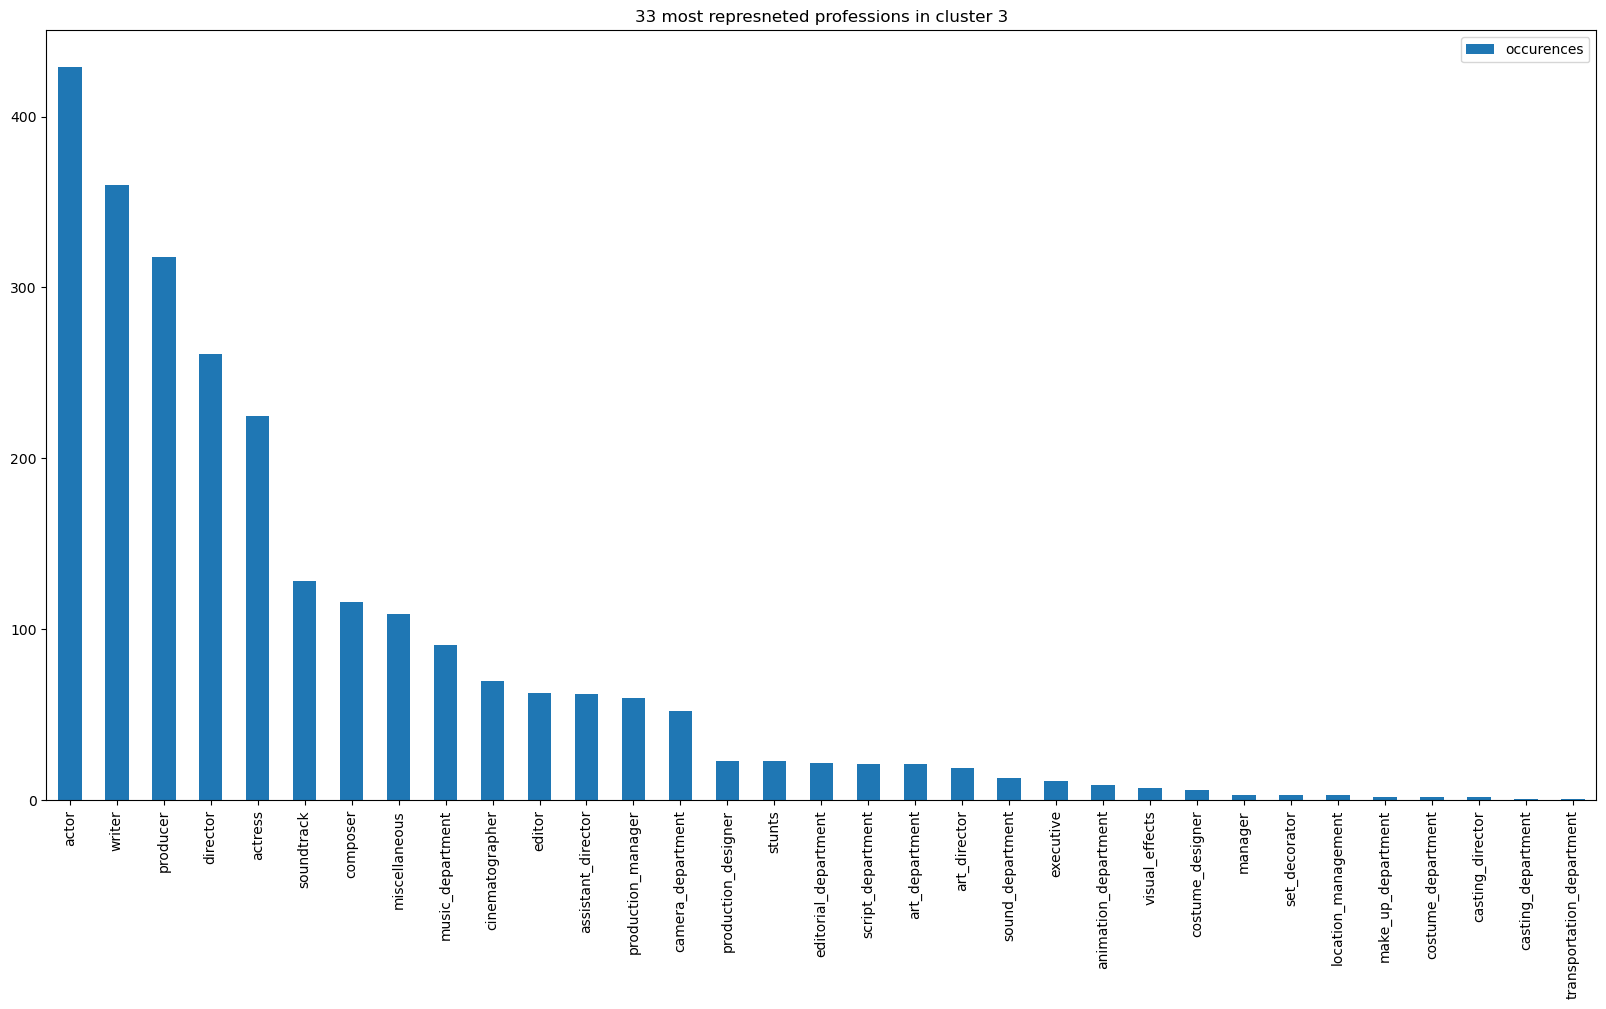

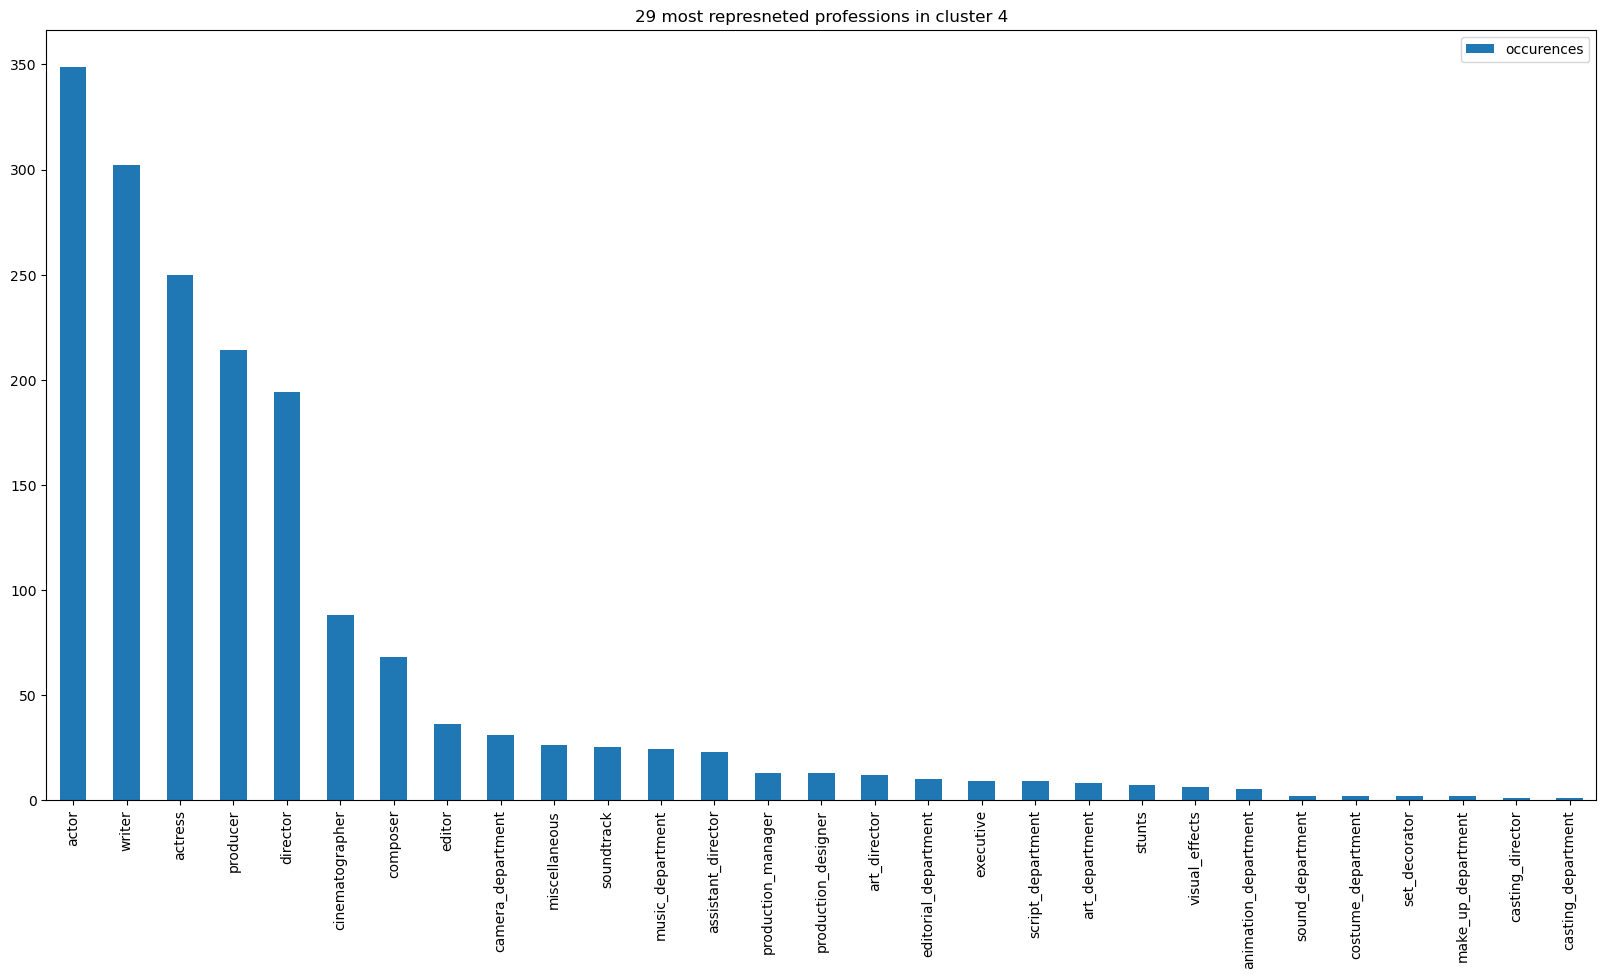

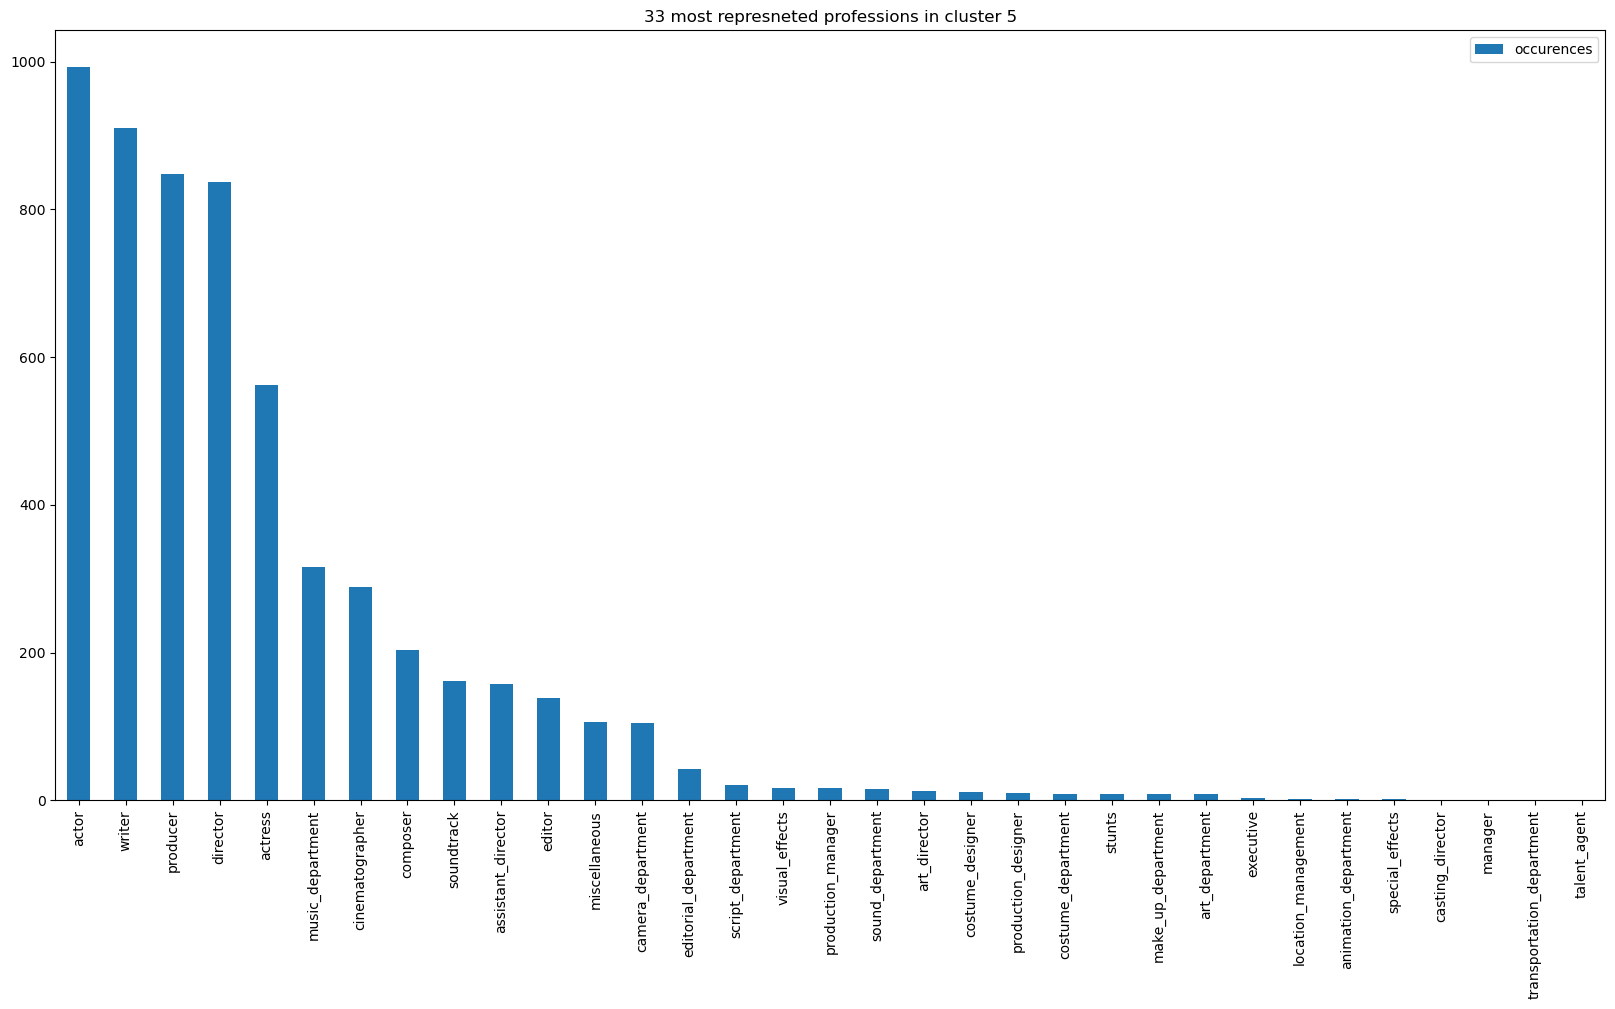

In [25]:
plot_prof((prof1, 1), (prof2, 2), (prof3, 3), (prof4, 4), (prof5, 5))

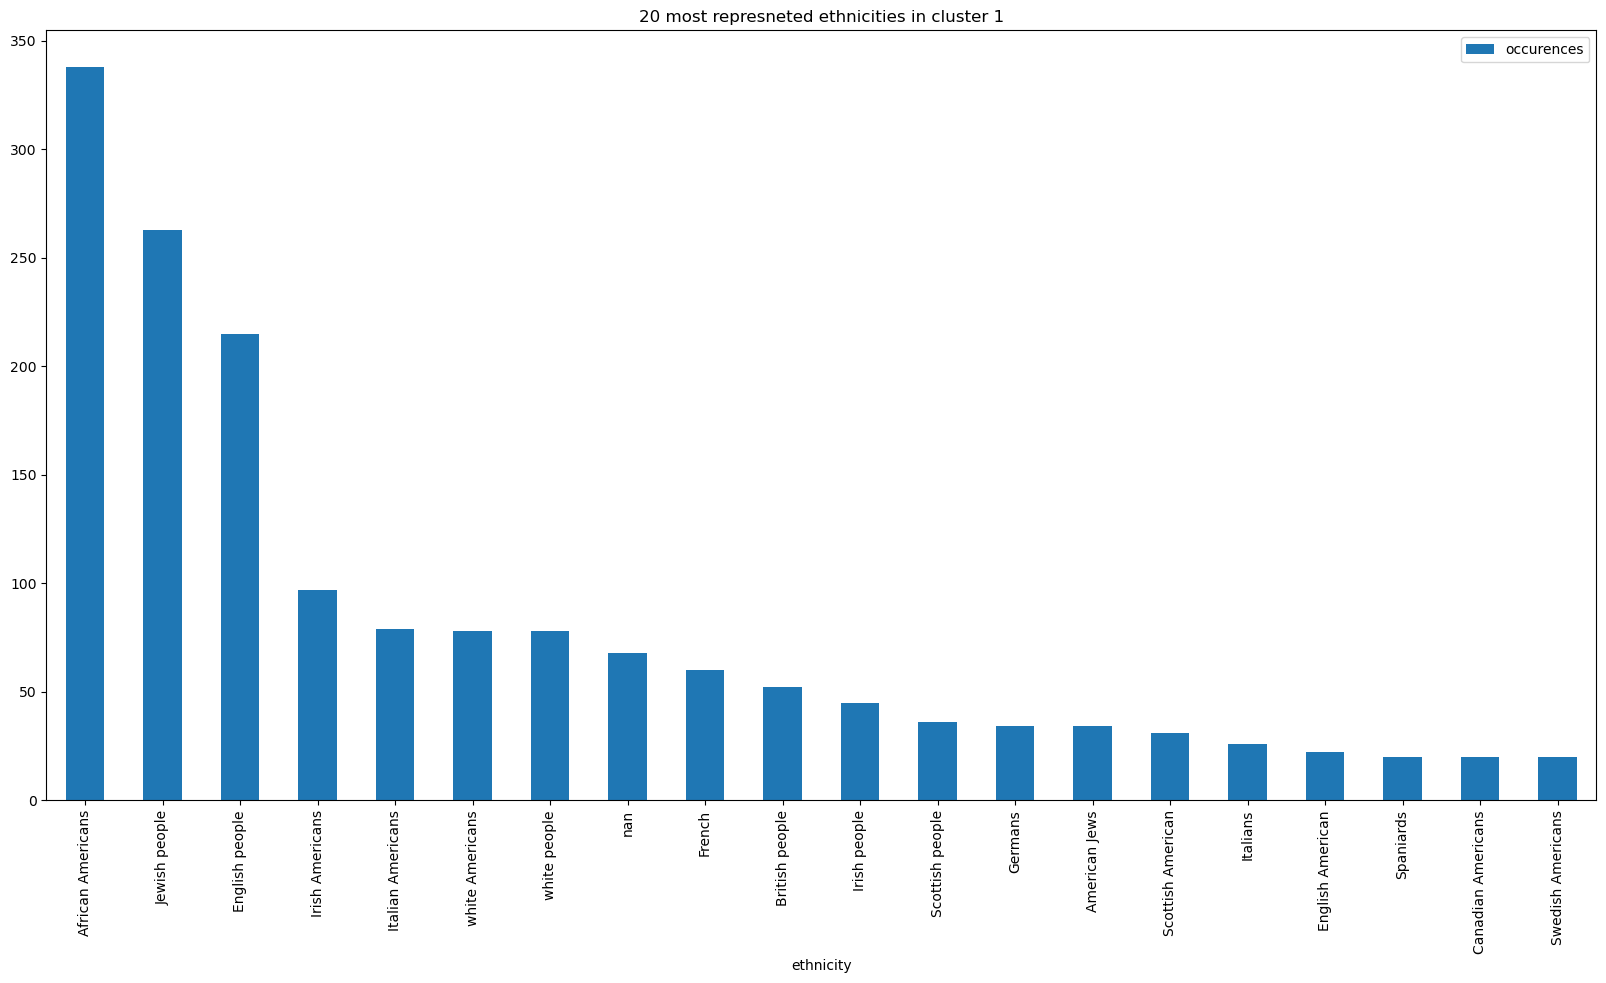

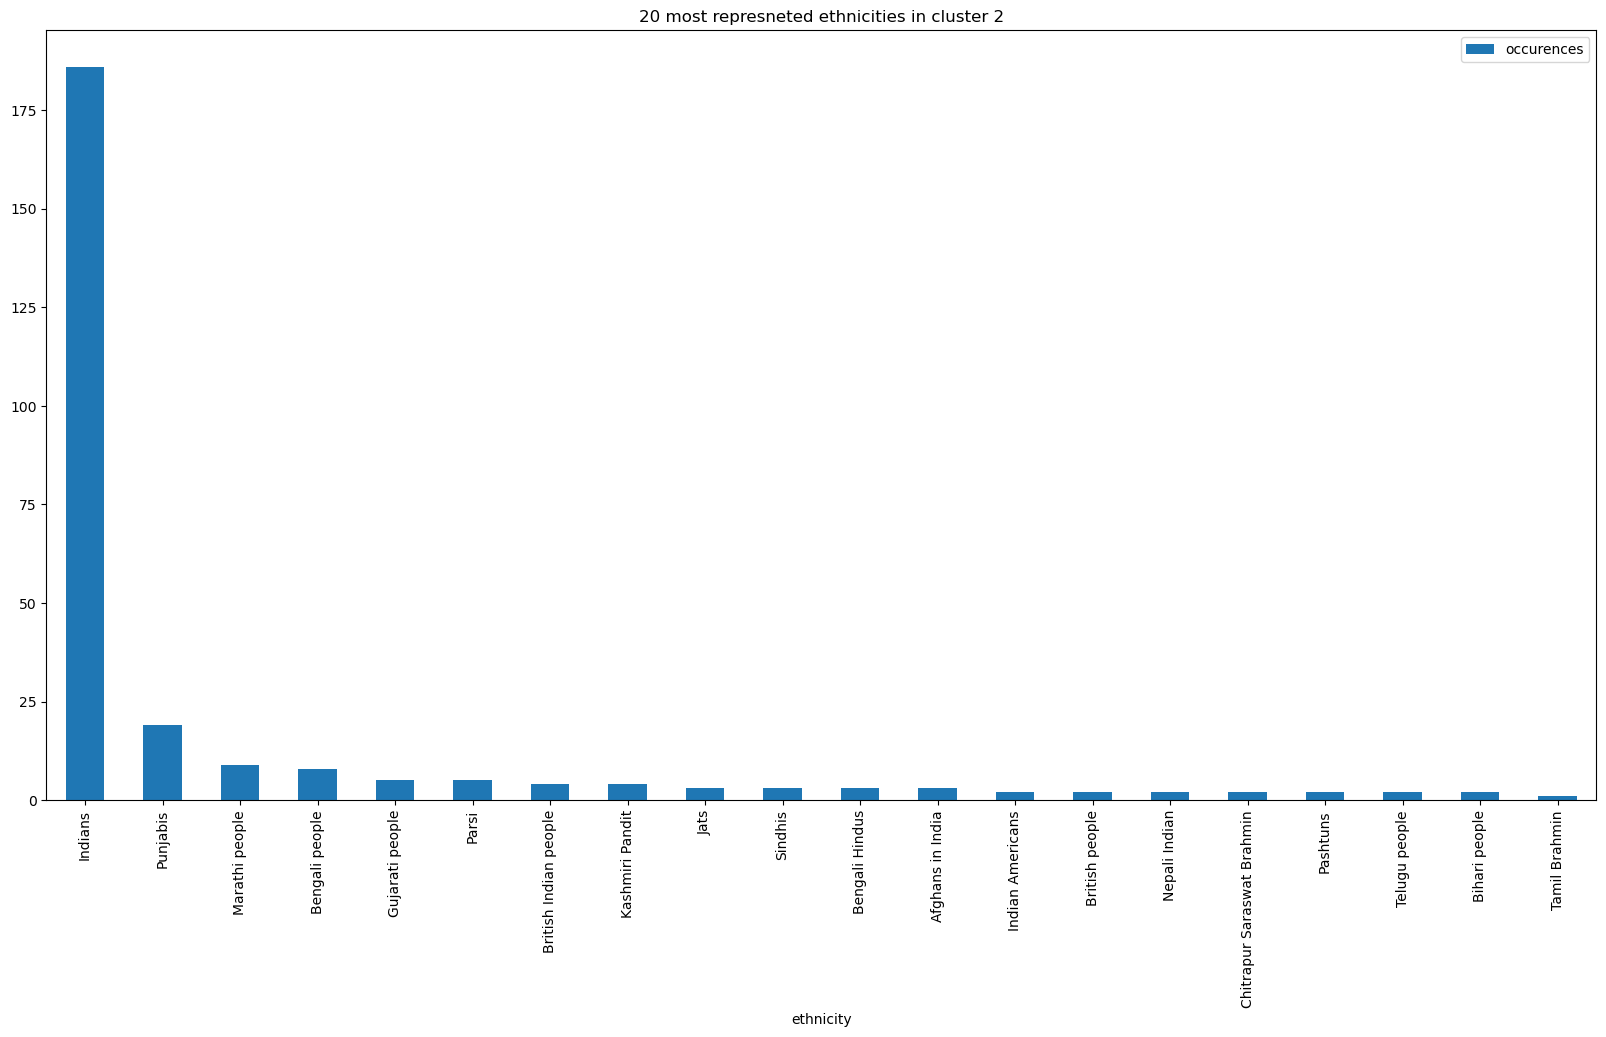

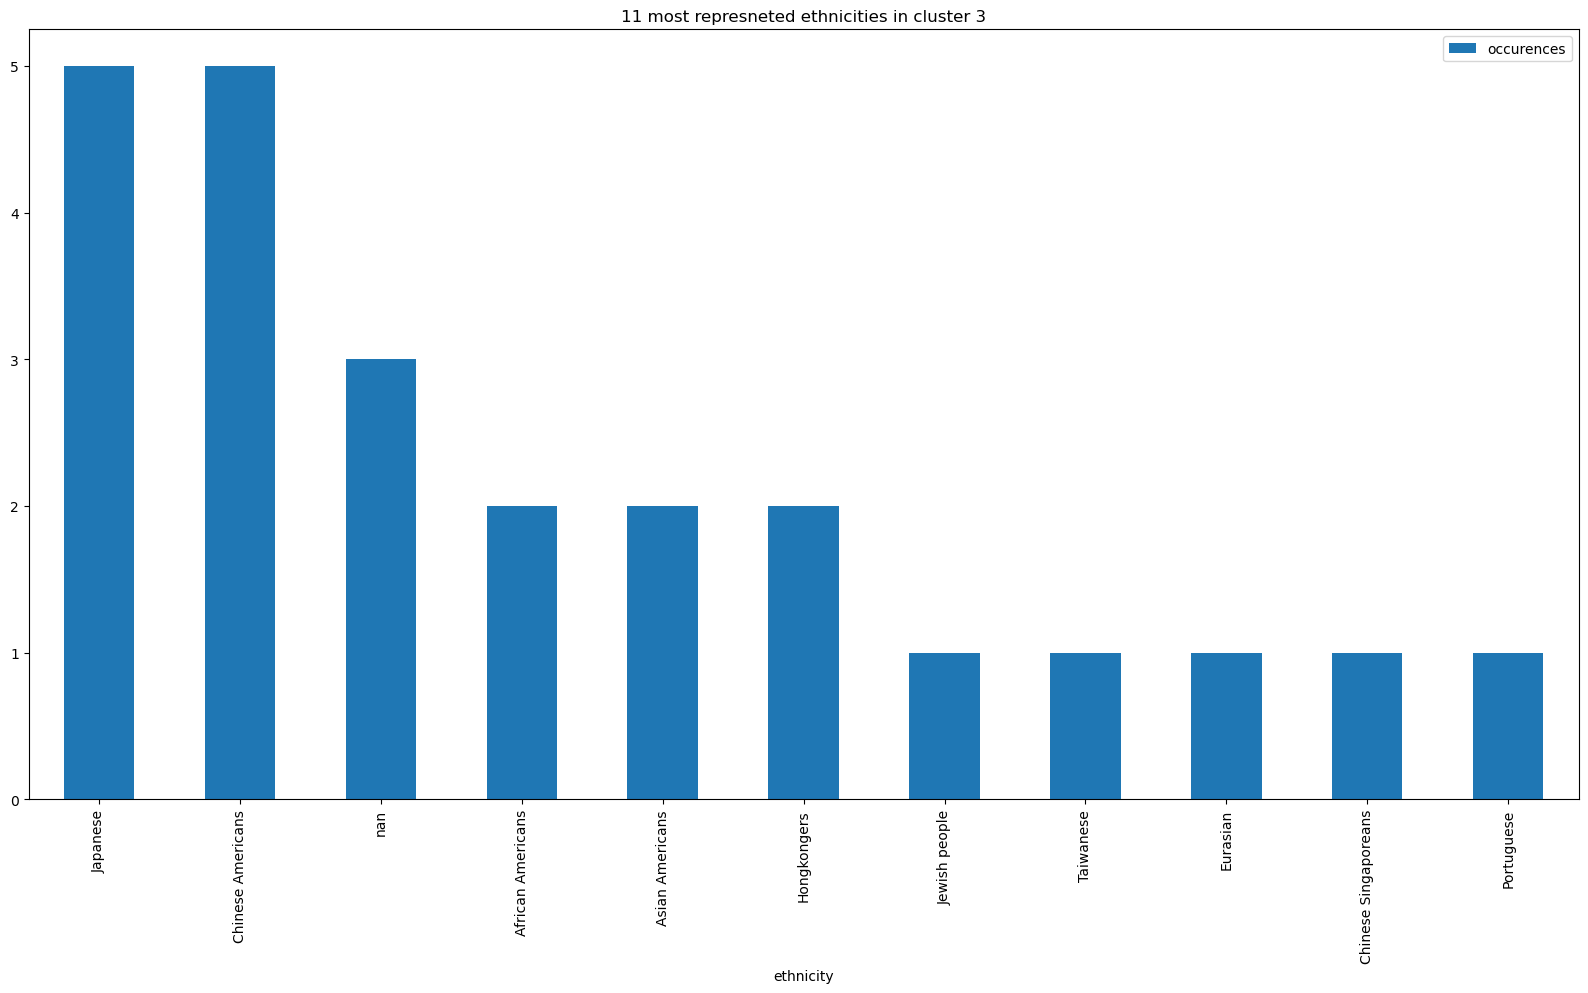

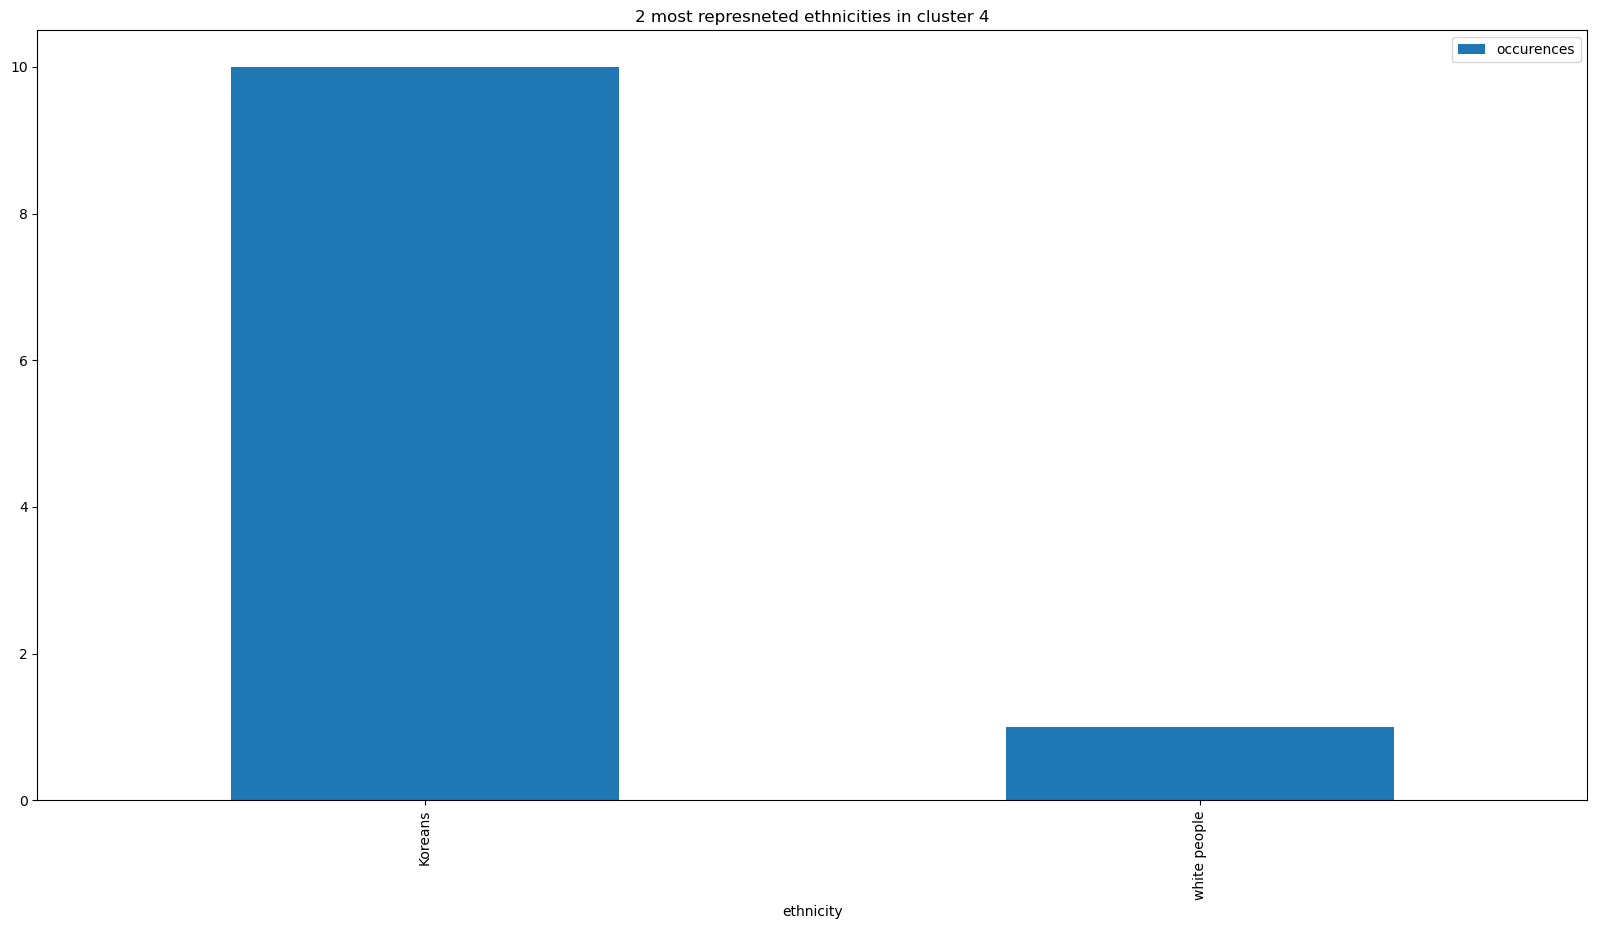

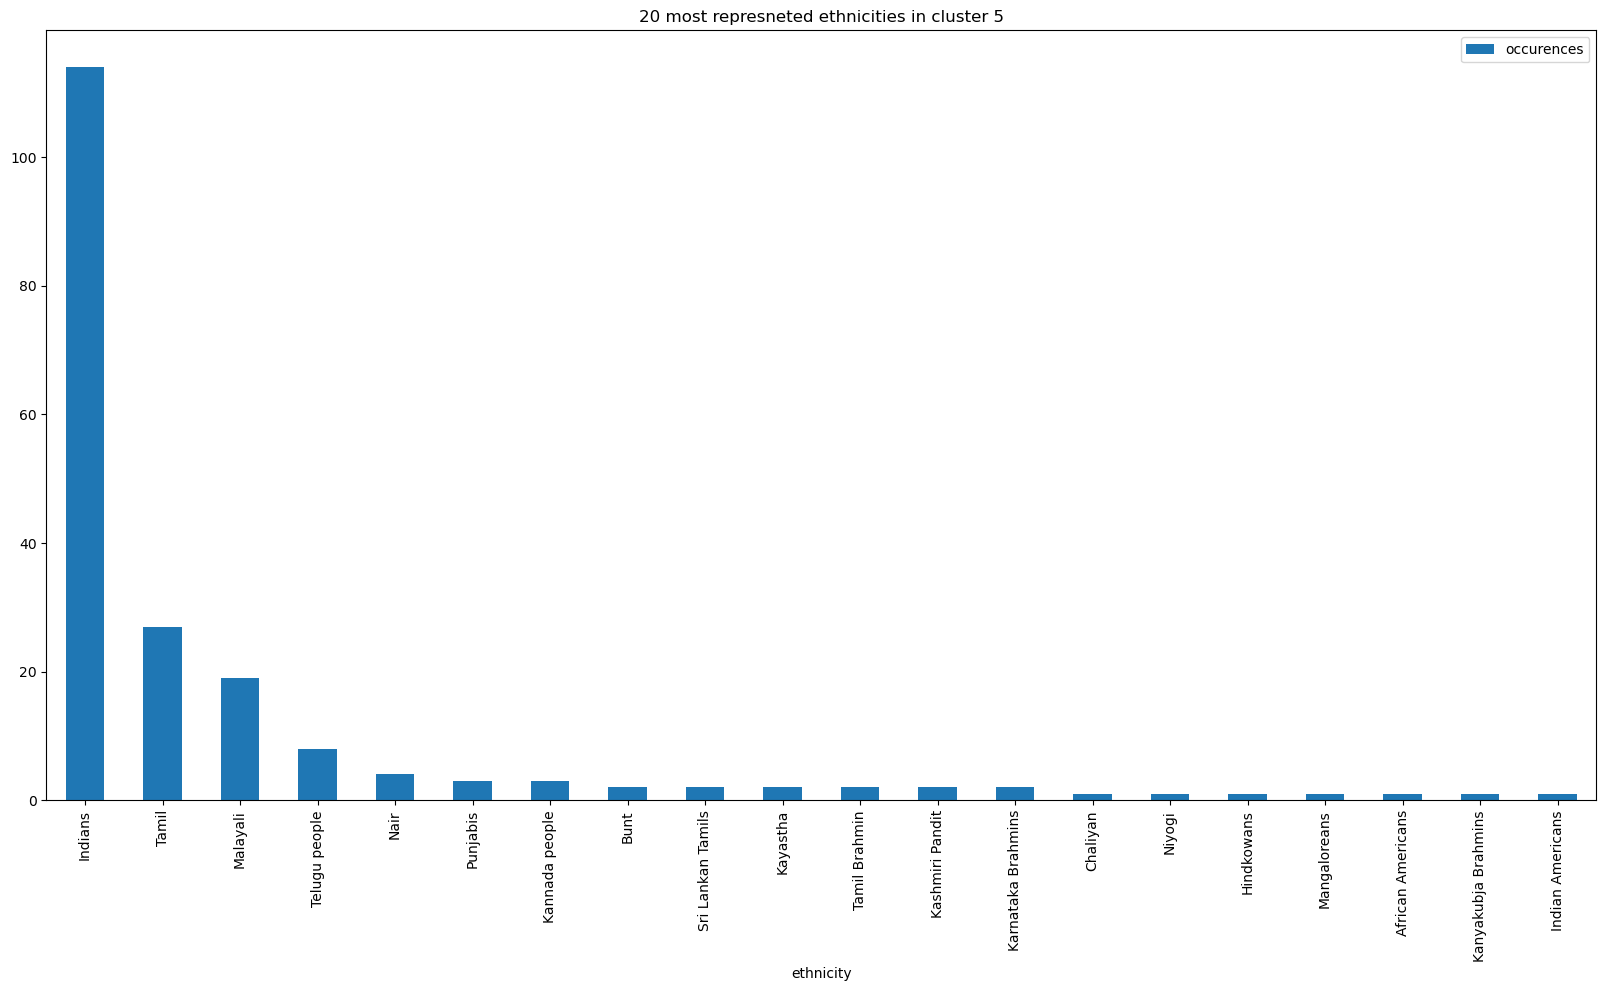

In [26]:

plot_eth((ethnicities1, 1), (ethnicities2, 2),
         (ethnicities3, 3), (ethnicities4, 4),(ethnicities5, 5) )


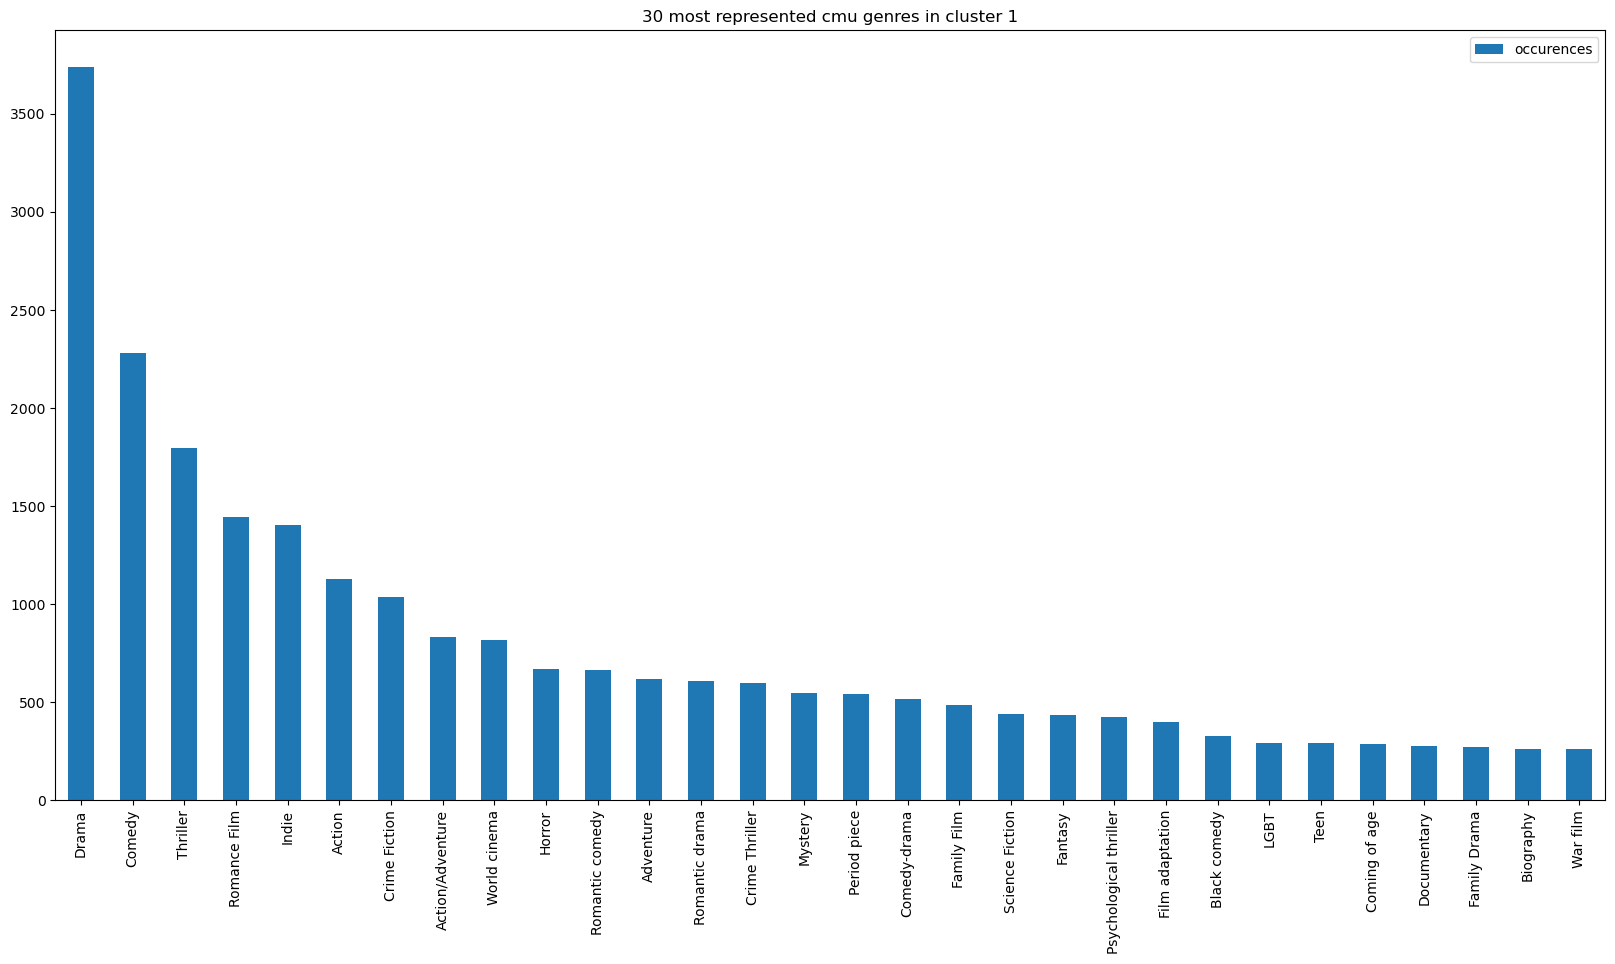

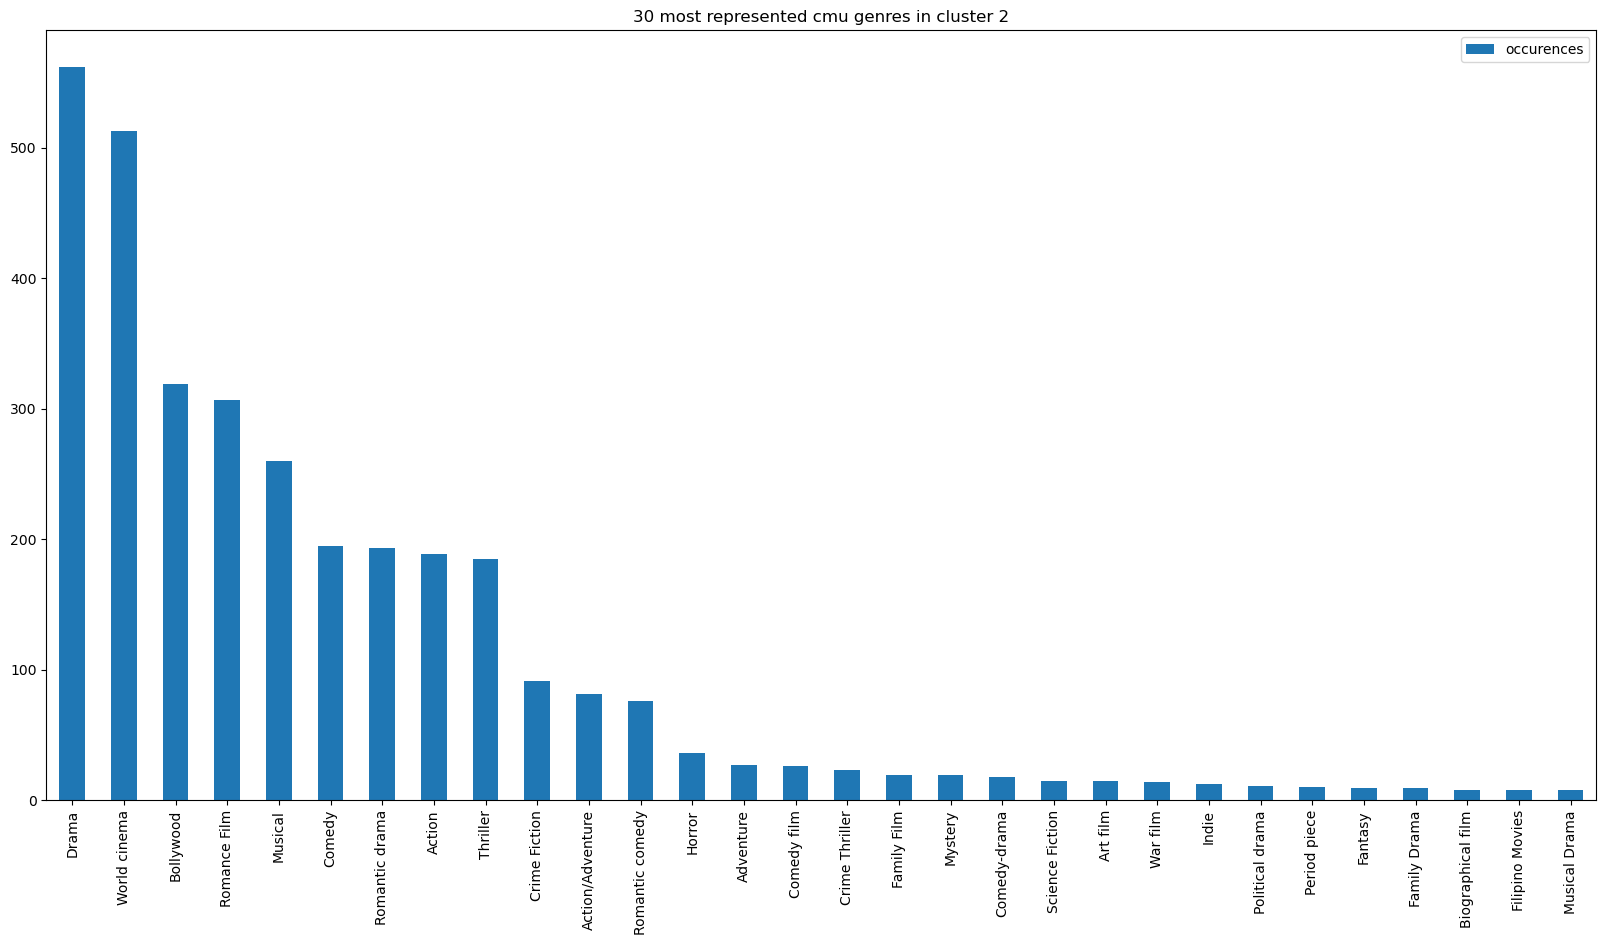

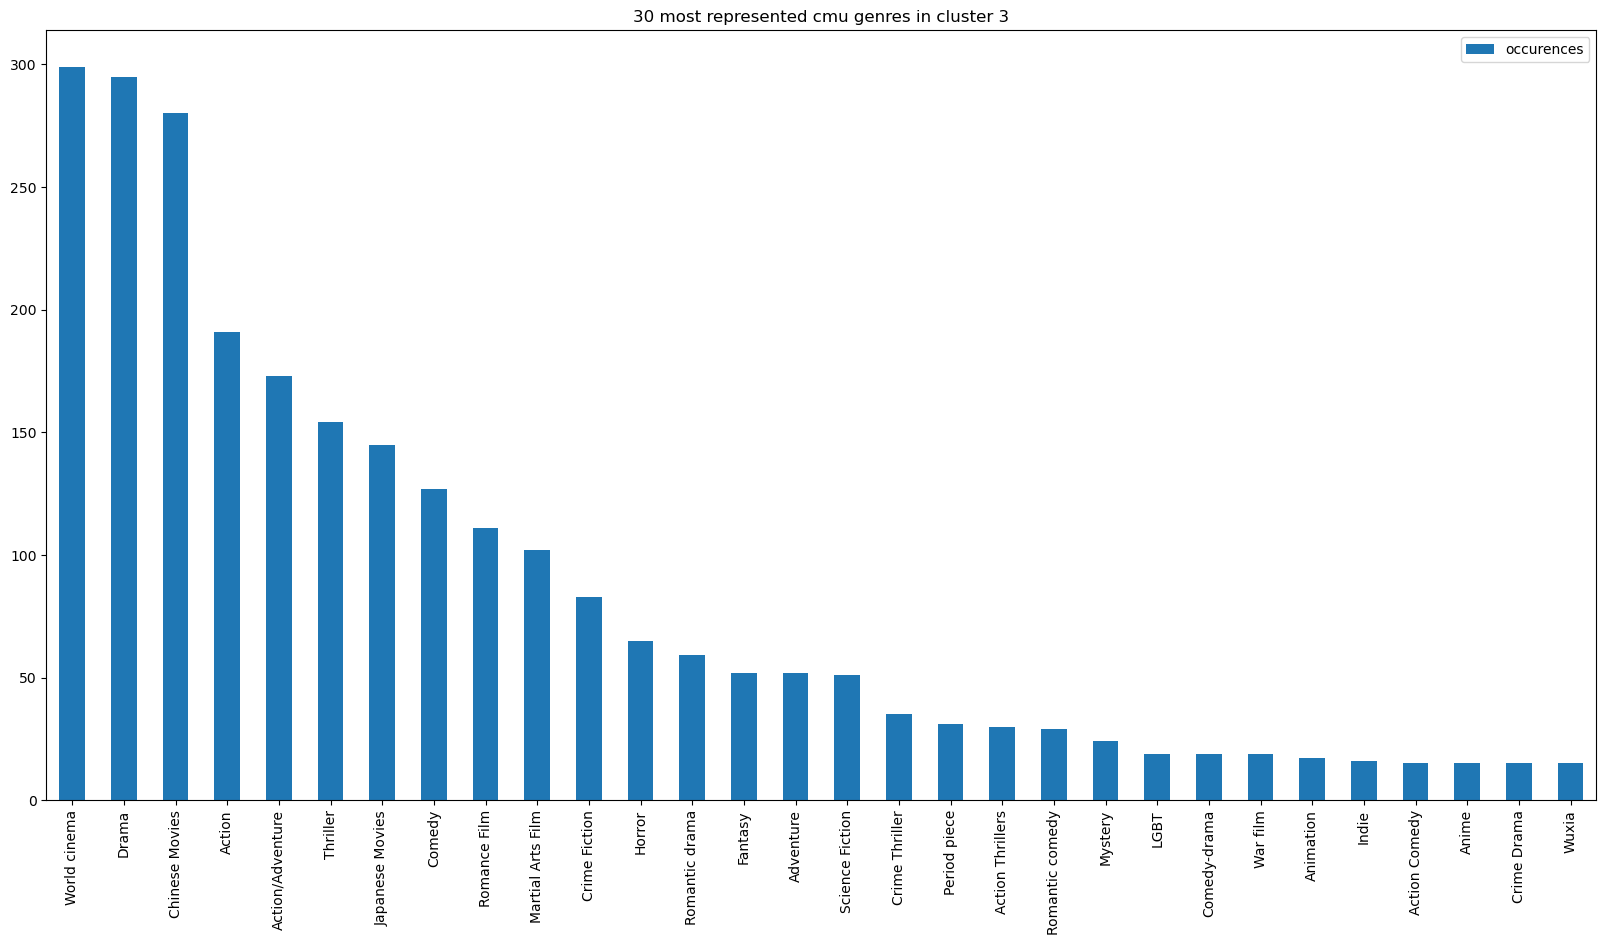

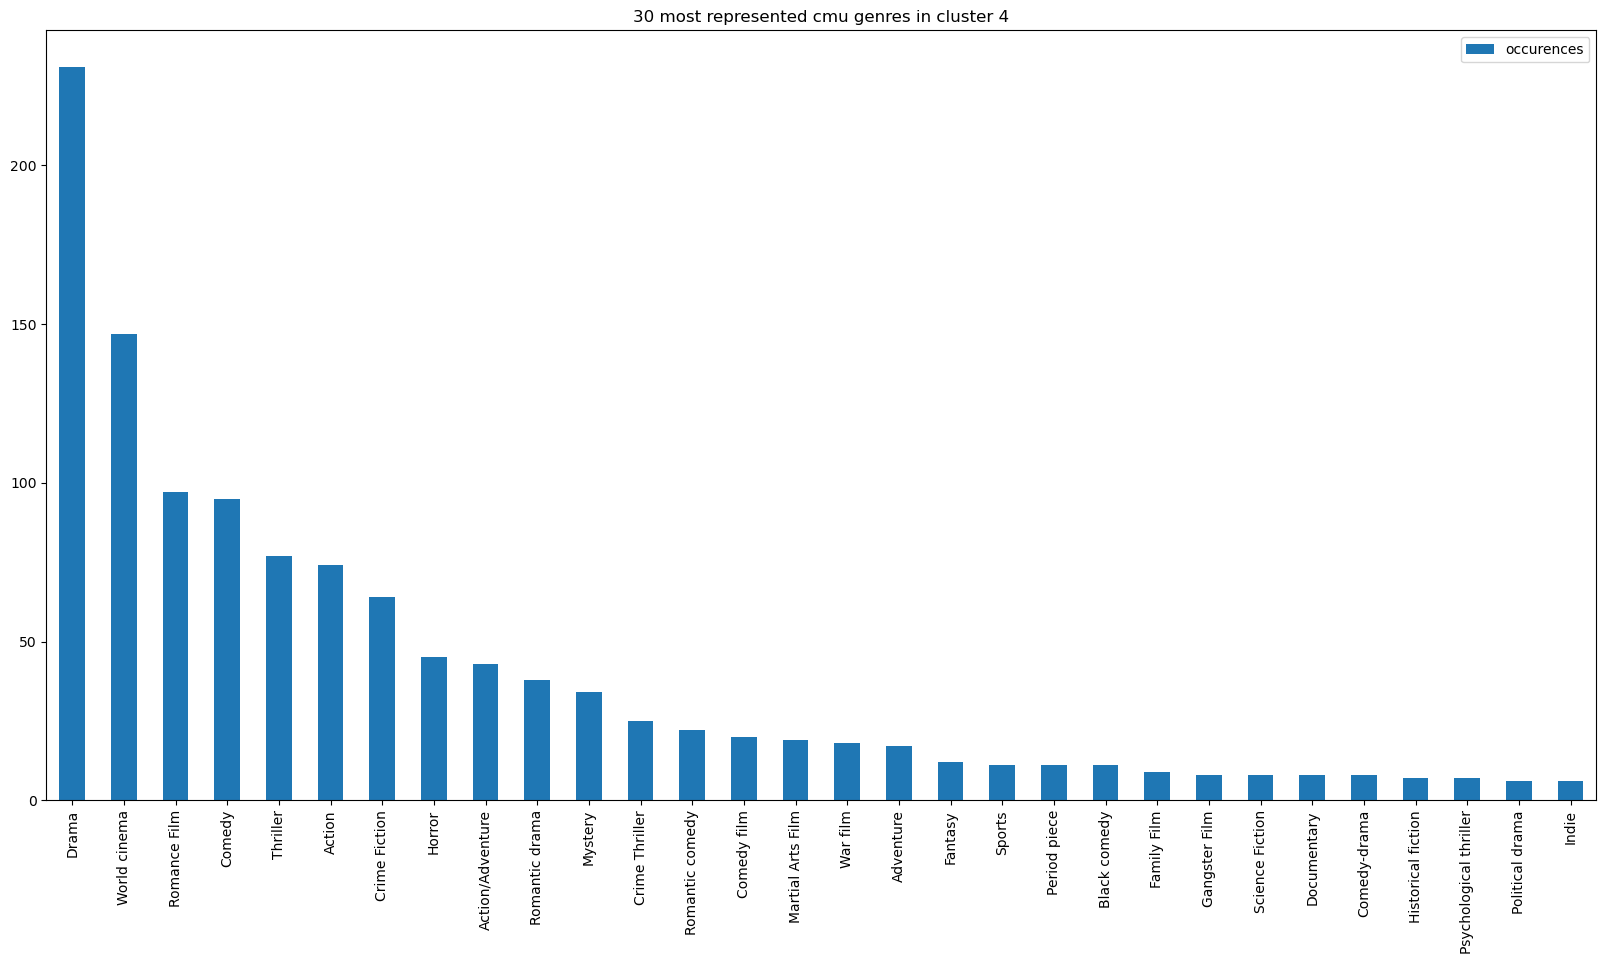

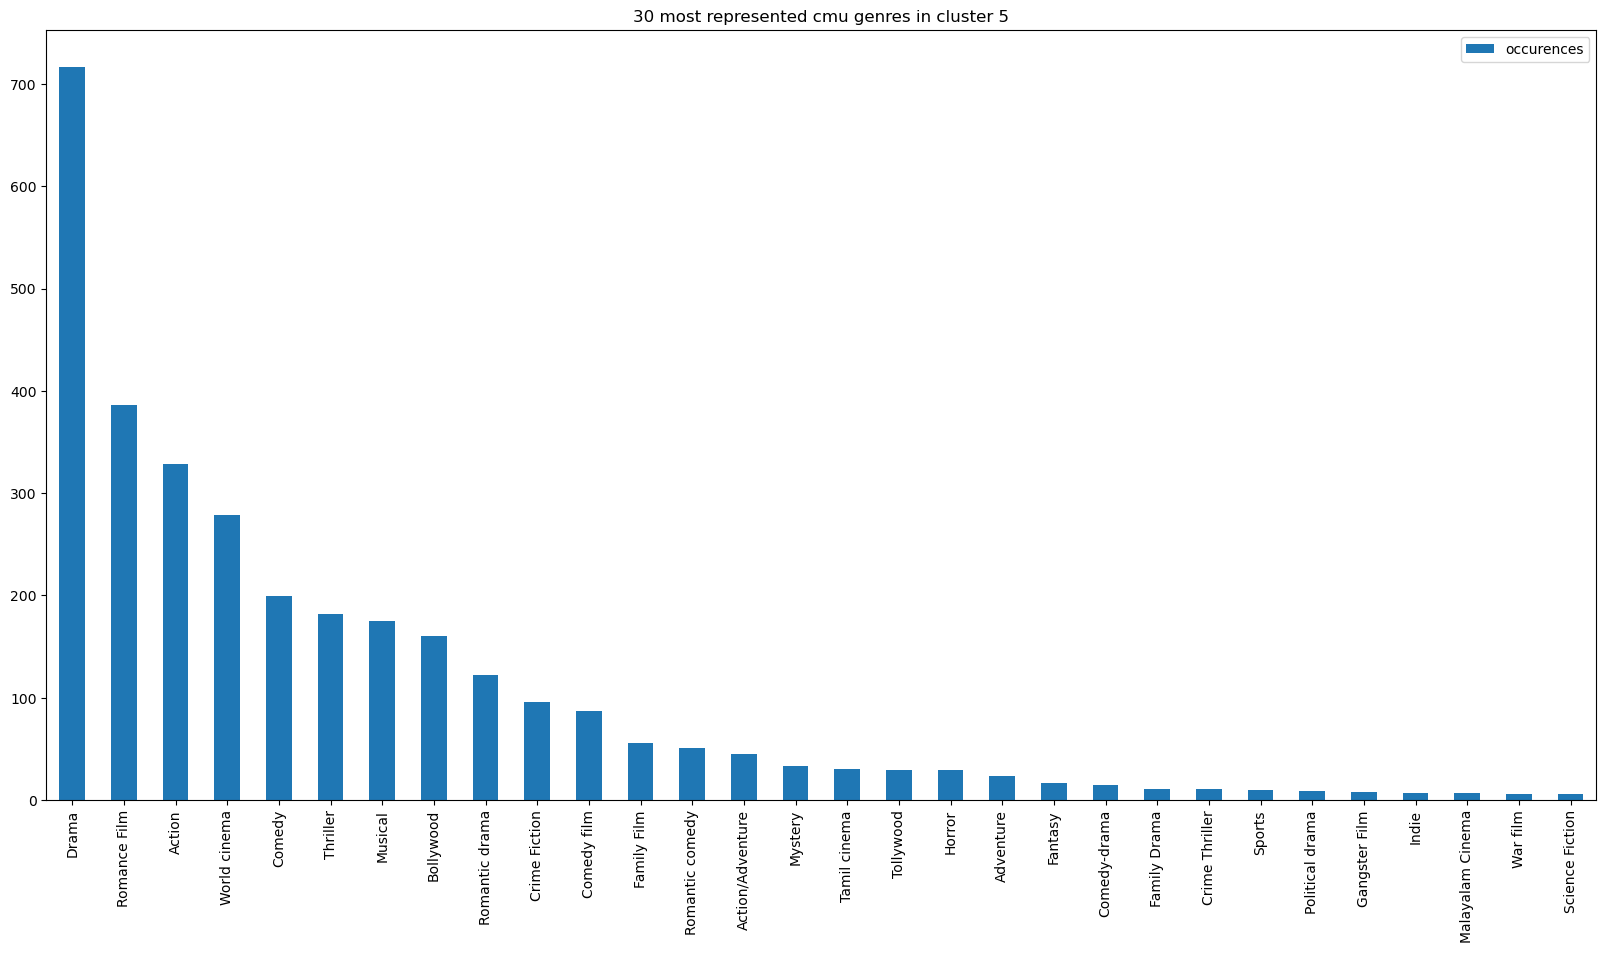

In [27]:
plot_cmu_genres((cmu_genres1, 1), (cmu_genres2, 2), (cmu_genres3, 3), (cmu_genres4, 4), (cmu_genres5, 5))

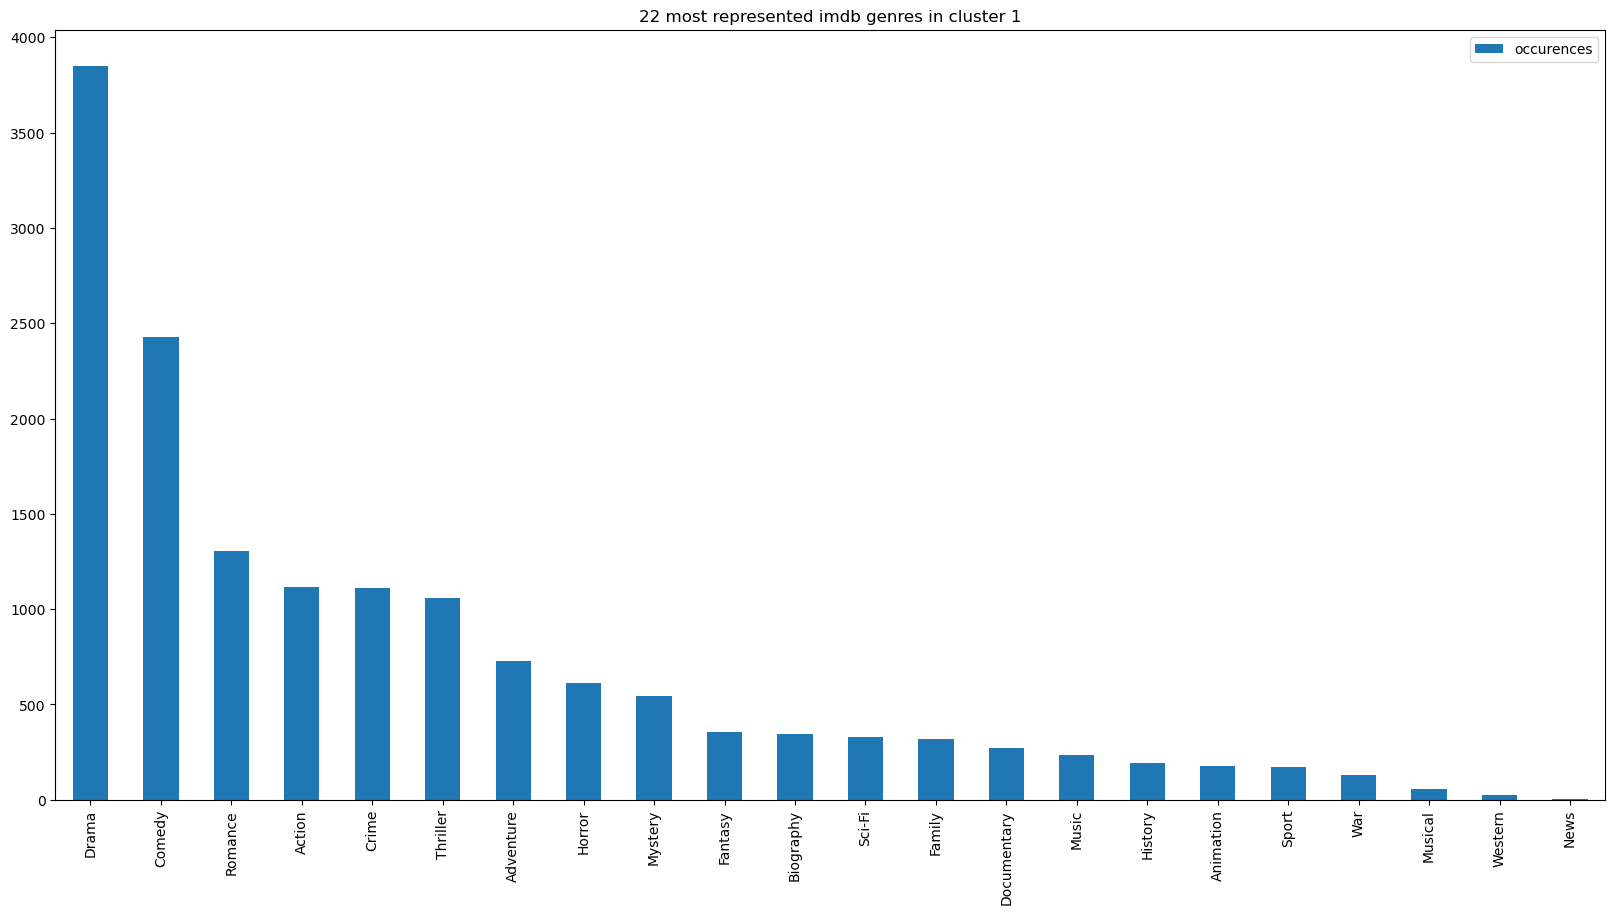

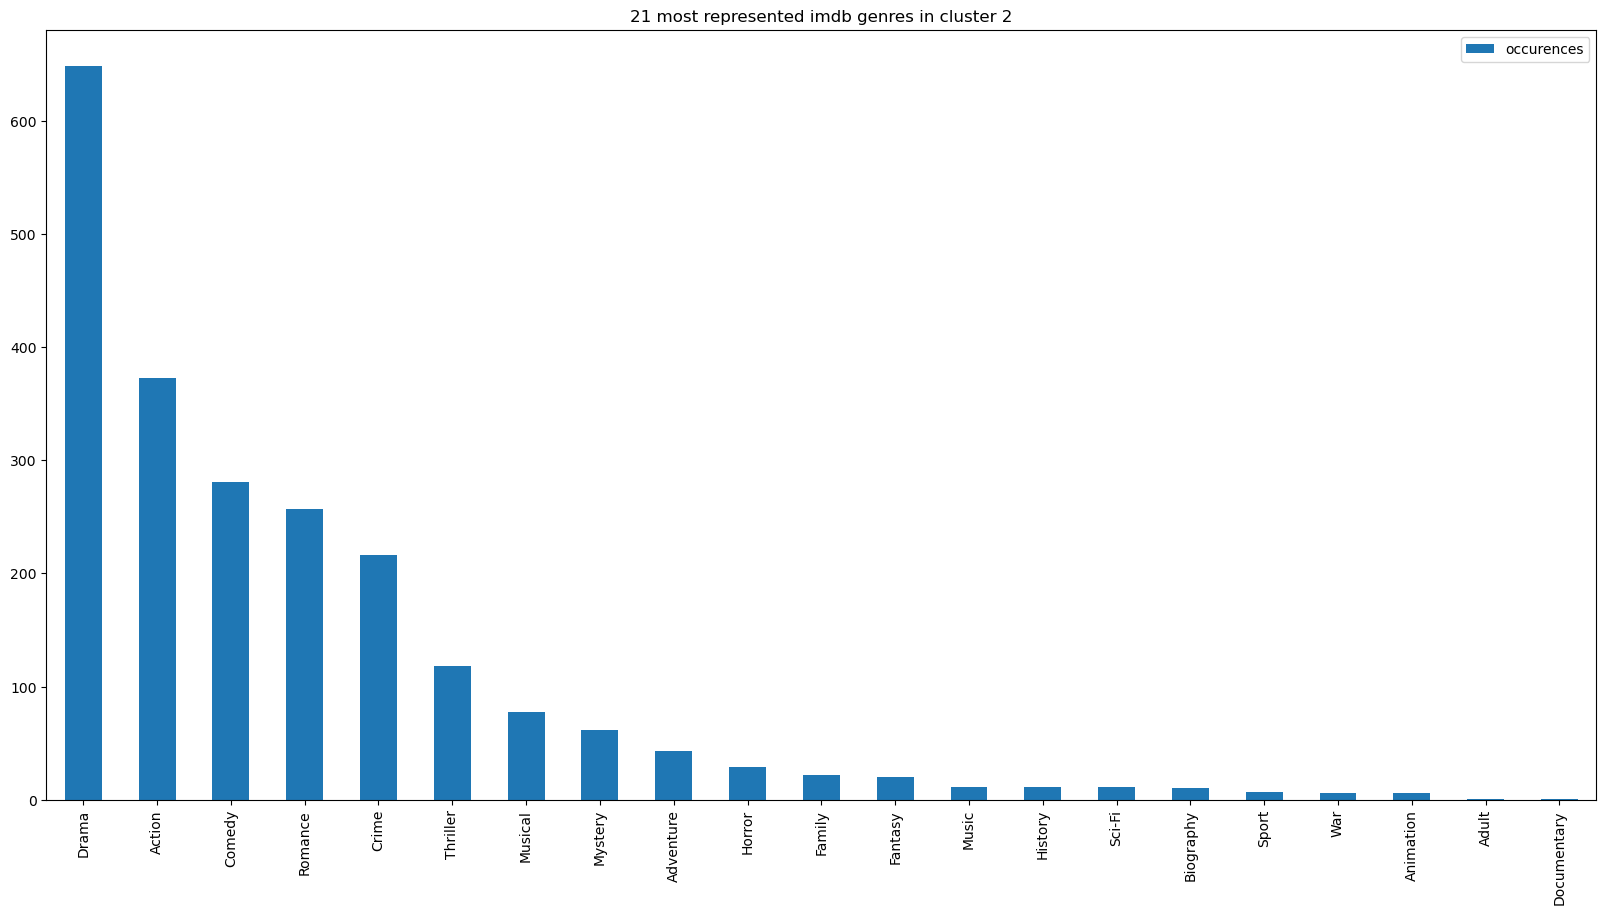

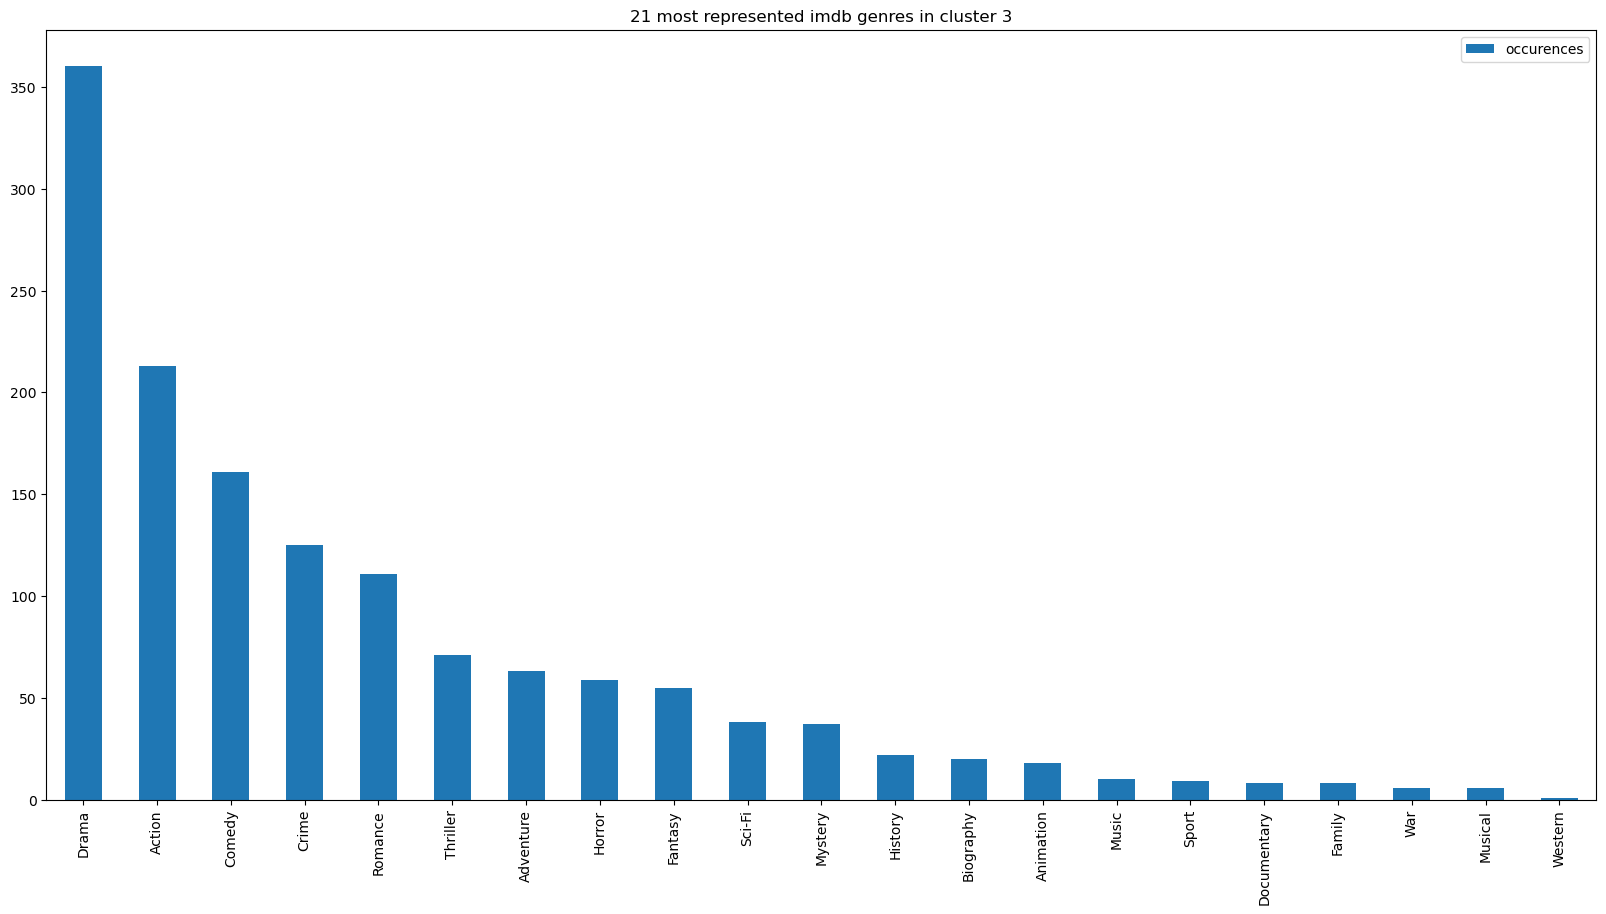

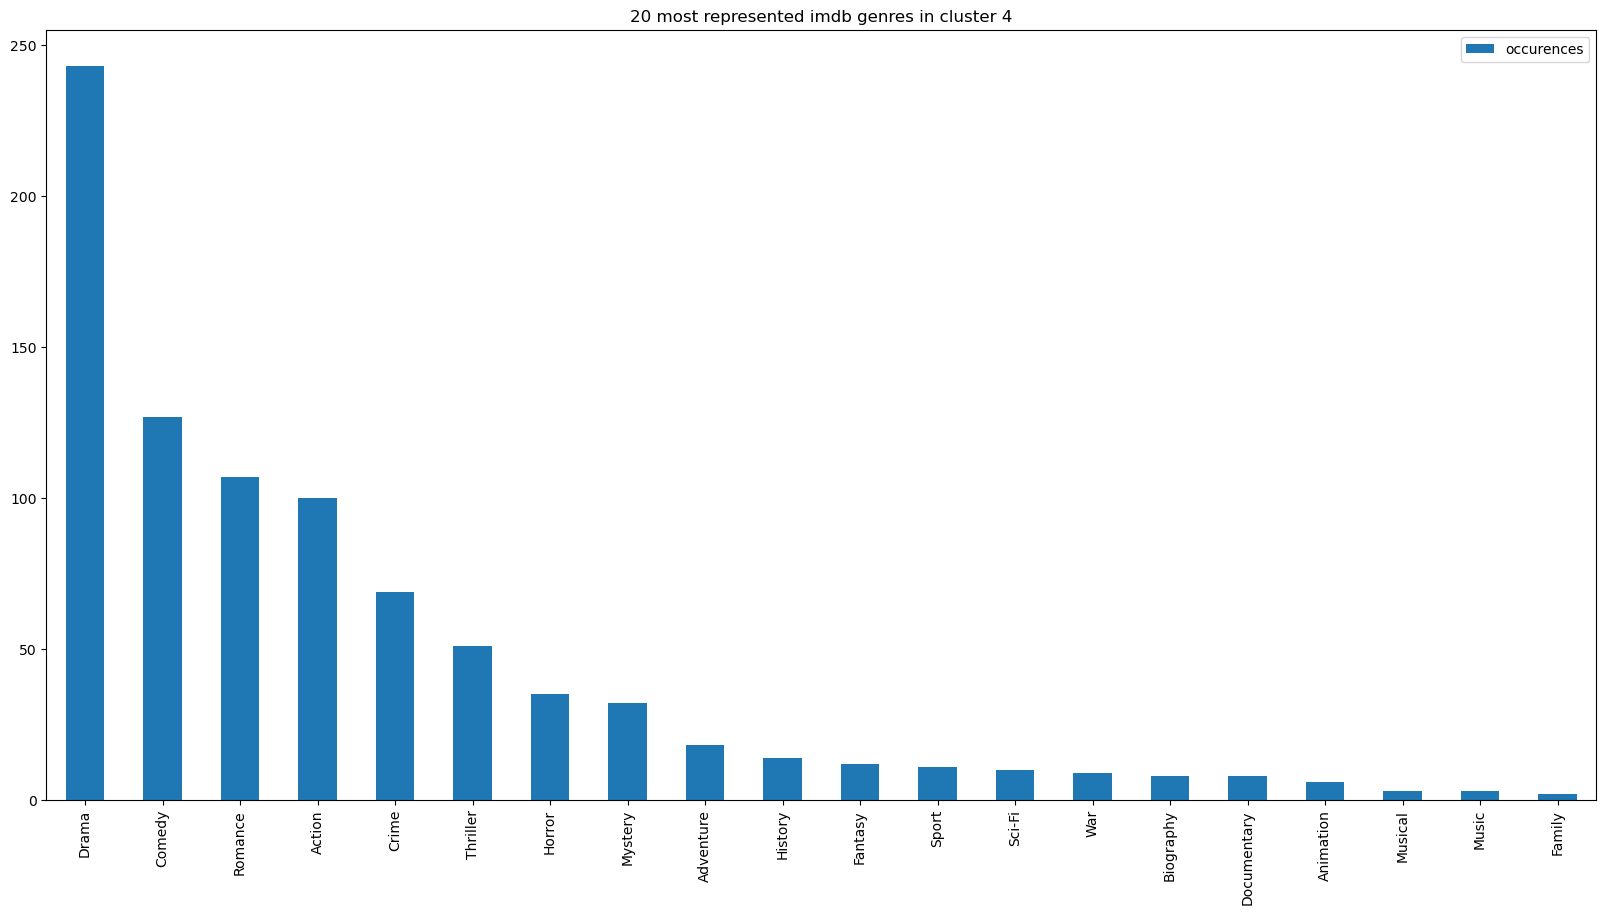

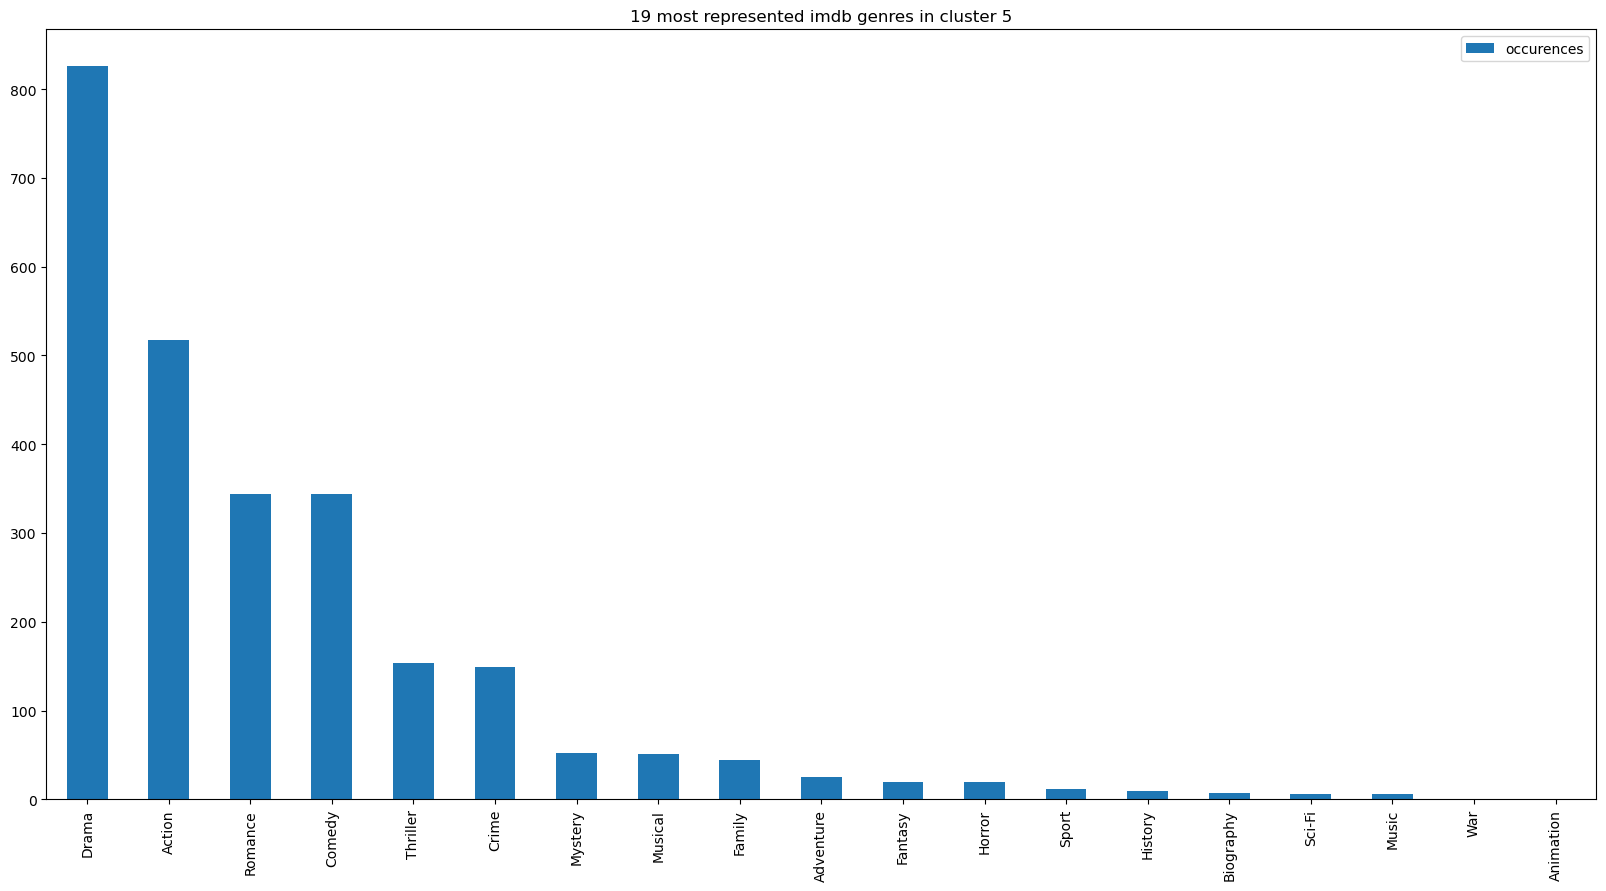

In [28]:
plot_imdb_genres((imdb_genres1, 1), (imdb_genres2, 2), (imdb_genres3, 3), (imdb_genres4, 4), (imdb_genres5, 5))

In [29]:
subclusters = load_cluster_dbscan()
#make subclusters into a dataframe
subclusters = pd.DataFrame.from_dict(subclusters, orient='index', columns=['cluster'])


In [30]:
subclusters.nunique()

cluster    389
dtype: int64

In [31]:
#compare entry person_name_id of cluster with subclusters. If match, check cluster_id of subclusters, then add it to new dataframe with cluster_id and person_name_id
def get_subclusters(cluster):
	df = subclusters.copy()
	#keep only rows of df which index in cluster corresponding to index in subcluster,
	df = df.loc[df.index.isin(cluster.index)]
	return df
		


In [32]:
sc1 = get_subclusters(cluster1)
sc2 = get_subclusters(cluster2)
sc3 = get_subclusters(cluster3)
sc4 = get_subclusters(cluster4)
sc5 = get_subclusters(cluster5)
sc6 = get_subclusters(cluster_outlier)

In [33]:
connections = load_cluster_coefficients()

In [34]:
connections

{'nm0000002': 0.11842650103519668,
 'nm0000005': 1.0,
 'nm0000008': 0.24126984126984127,
 'nm0000016': 1.0,
 'nm0000018': 0.3076923076923077,
 'nm0000025': 0.086651411136537,
 'nm0000032': 0.47058823529411764,
 'nm0000035': 0.06929536327126688,
 'nm0000040': 1.0,
 'nm0000041': 0.47058823529411764,
 'nm0000047': 1.0,
 'nm0000052': 0.5367647058823529,
 'nm0000056': 0.15764705882352942,
 'nm0000063': 0.47058823529411764,
 'nm0000065': 1.0,
 'nm0000080': 0.47058823529411764,
 'nm0000084': 0.11159346271705822,
 'nm0000085': 1.0,
 'nm0000090': 0.09639498432601881,
 'nm0000091': 0.47058823529411764,
 'nm0000092': 0.16541353383458646,
 'nm0000093': 0.0650333273284093,
 'nm0000095': 0.13223626212165737,
 'nm0000096': 0.1509433962264151,
 'nm0000097': 0.23616734143049933,
 'nm0000098': 0.06192050310408772,
 'nm0000099': 0.1267605633802817,
 'nm0000100': 0.2746031746031746,
 'nm0000101': 0.08553113553113553,
 'nm0000102': 0.05567970204841713,
 'nm0000103': 0.1206308610400682,
 'nm0000104': 0.0542

In [35]:
graph = load_graph()
position = load_positions()

In [36]:
def get_connections(cluster):
    cluster_co = {n: graph.nodes[n] for n in cluster.index}
    cluster_co = pd.DataFrame.from_dict(cluster_co, orient='index')
    #keep only num_connetions
    cluster_co = cluster_co[['num_connections']]
    #create new columns occurences, and for each unique num_connections, count the occurence and add it to occurences
    cluster_co['occurences'] = 0
    for num in cluster_co['num_connections'].unique():
        cluster_co.loc[cluster_co['num_connections'] == num, 'occurences'] = cluster_co[cluster_co['num_connections'] == num].shape[0]
    #for all index with same num_connections, make a list of the index
    cluster_co['index'] = cluster_co.index
    cluster_co = cluster_co[['num_connections', 'occurences', 'index']]
    cluster_co.set_index('num_connections', inplace=True)
    #for all duplicate index, make a list of the index
    cluster_co['index'] = cluster_co.groupby(level=0).agg({'index': lambda x: list(x)})
    # drop duplicates
    cluster_co = cluster_co[~cluster_co.index.duplicated(keep='first')]
    #sort by descending index
    cluster_co.sort_index(ascending=False, inplace=True)
    return cluster_co

In [37]:
cluster1_connections = get_connections(cluster1)
cluster2_connections = get_connections(cluster2)
cluster3_connections = get_connections(cluster3)
cluster4_connections = get_connections(cluster4)
cluster5_connections = get_connections(cluster5)

position = {n: position[n] for n in cluster1.index}

In [38]:
print(cluster1_connections[:1].index[0] * 100 / len(cluster1))
print(cluster2_connections[:1].index[0] * 100 / len(cluster2))
print(cluster3_connections[:1].index[0] * 100 / len(cluster3))
print(cluster4_connections[:1].index[0] * 100 / len(cluster4))
print(cluster5_connections[:1].index[0] * 100 / len(cluster5))

1.4124404925837037
29.604130808950085
21.32895816242822
12.192982456140351
20.772223885064353


In [39]:
def plot_connections(*args):
    for (cos, id) in args:
        #print(eth, id)
        co = cos.copy()

        #get name of variable eth
        y = co['occurences']
        x = co.index
        #make x a dataframe
        co = pd.DataFrame({'occurences': y, 'num_connections': x})
        print(co)
        
        title = '30 most connected people in cluster {}'.format( id)
        #invert x and y axis
        co.plot.bar(x='occurences', y='num_connections', figsize=(20,10), title=title)
    

                 occurences  num_connections
num_connections                             
359                       1              359
342                       1              342
330                       1              330
320                       1              320
315                       1              315
...                     ...              ...
6                       140                6
5                       133                5
4                        28                4
3                        12                3
2                         2                2

[240 rows x 2 columns]
                 occurences  num_connections
num_connections                             
688                       1              688
647                       1              647
477                       1              477
433                       1              433
375                       1              375
...                     ...              ...
8                        84    

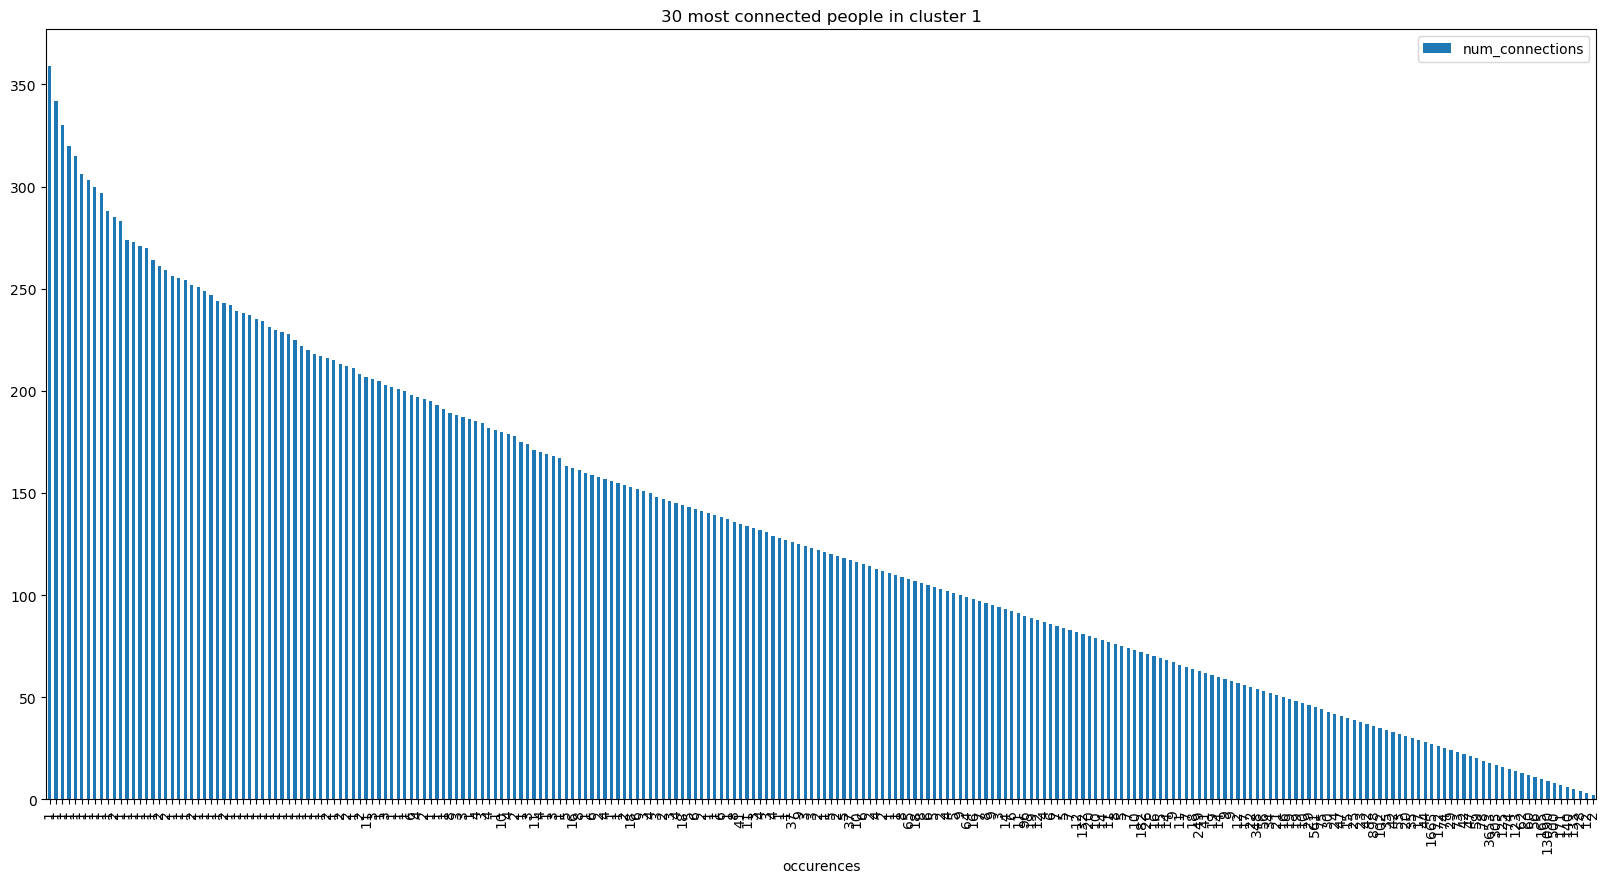

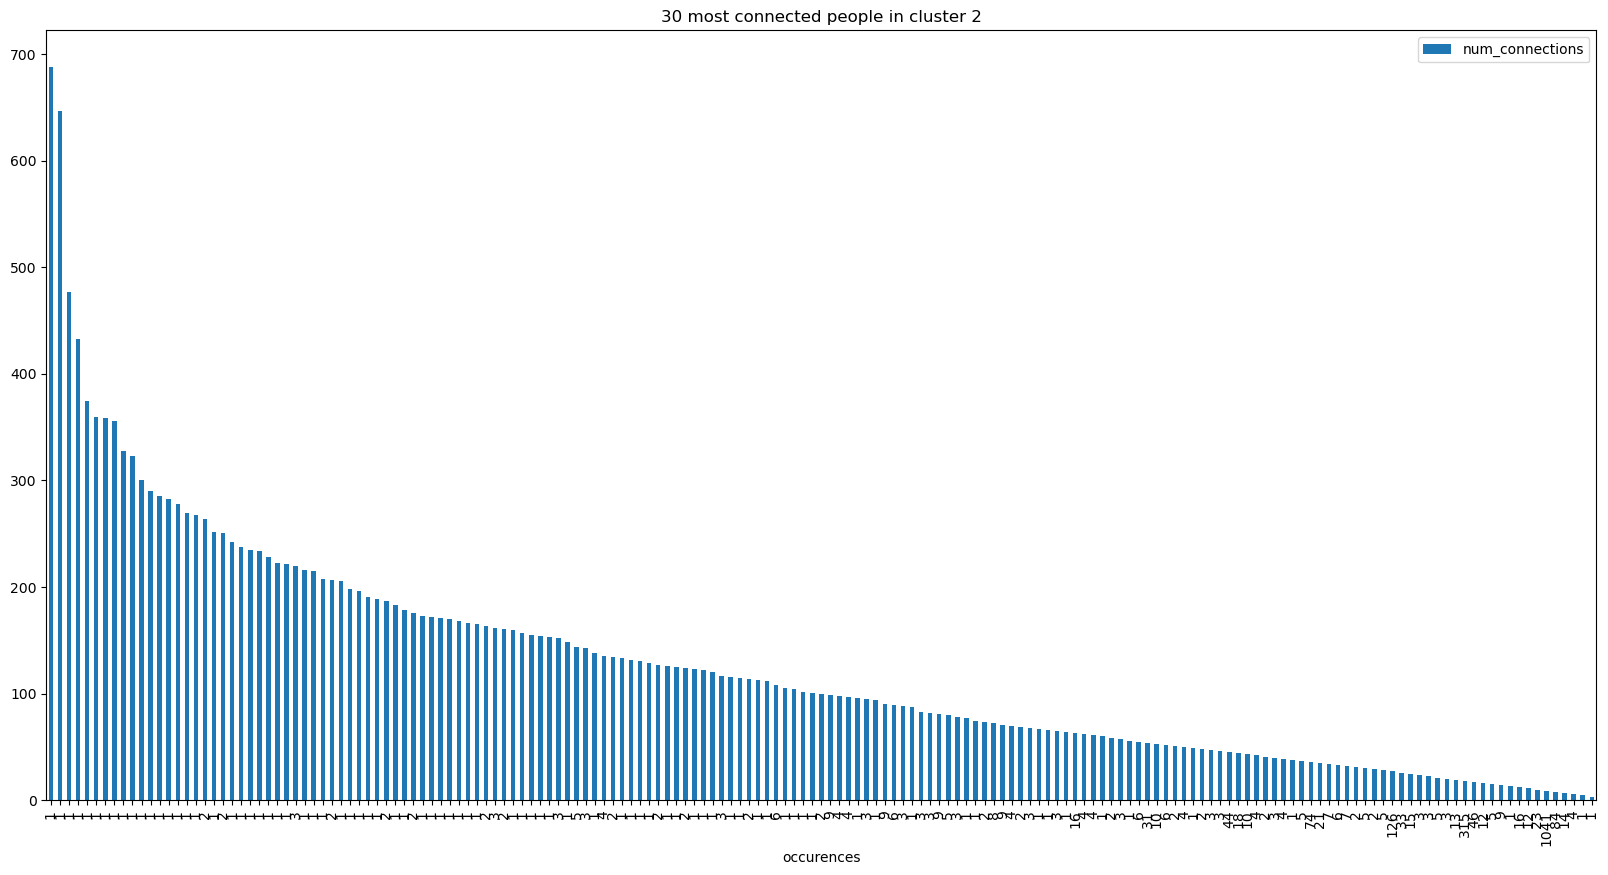

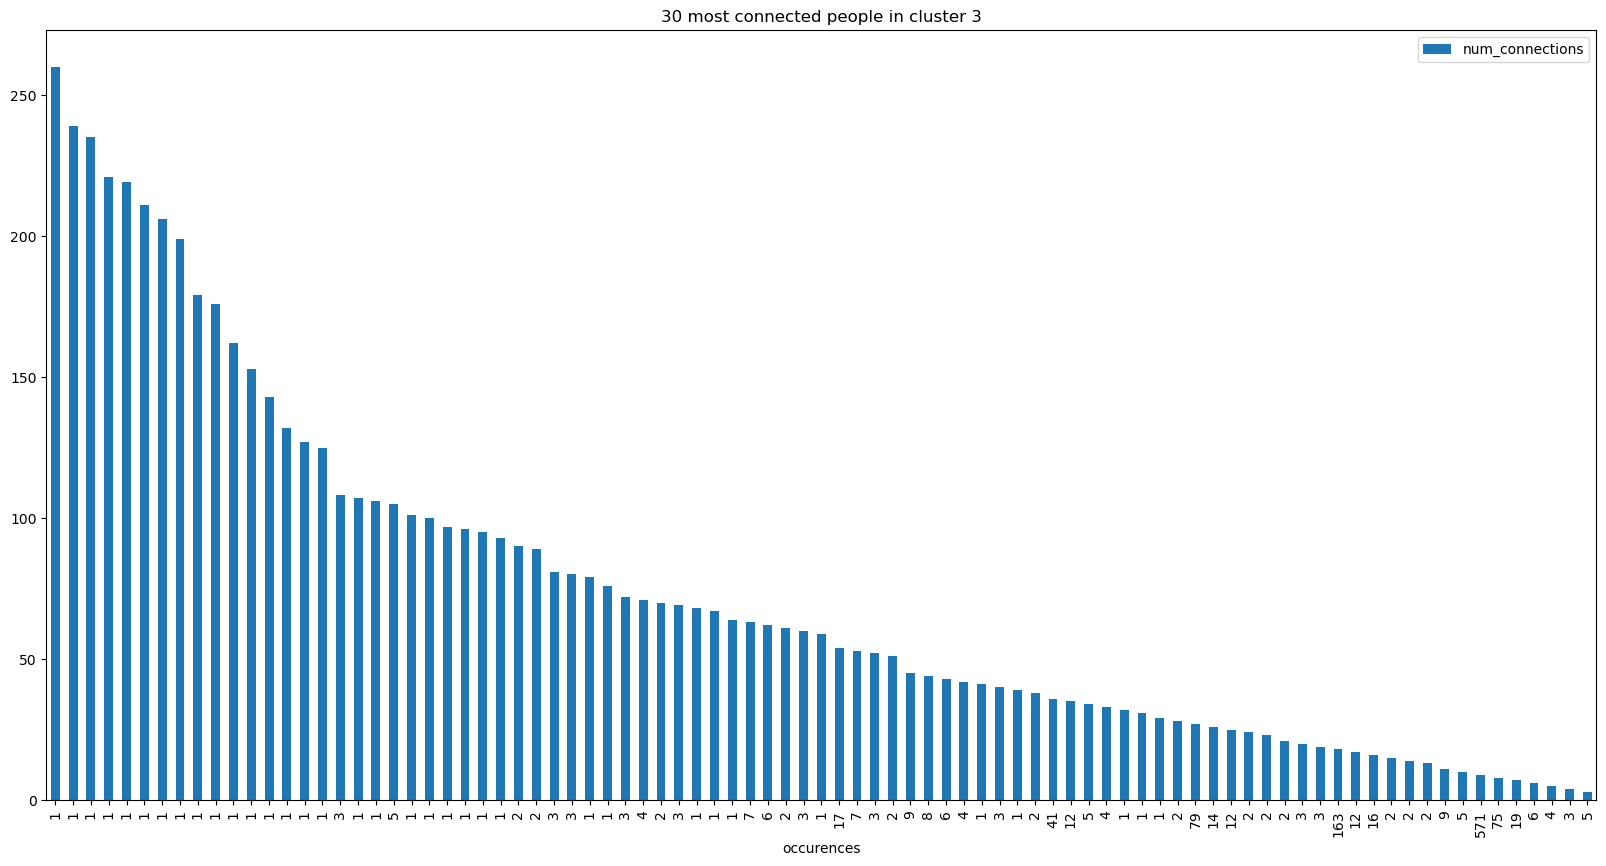

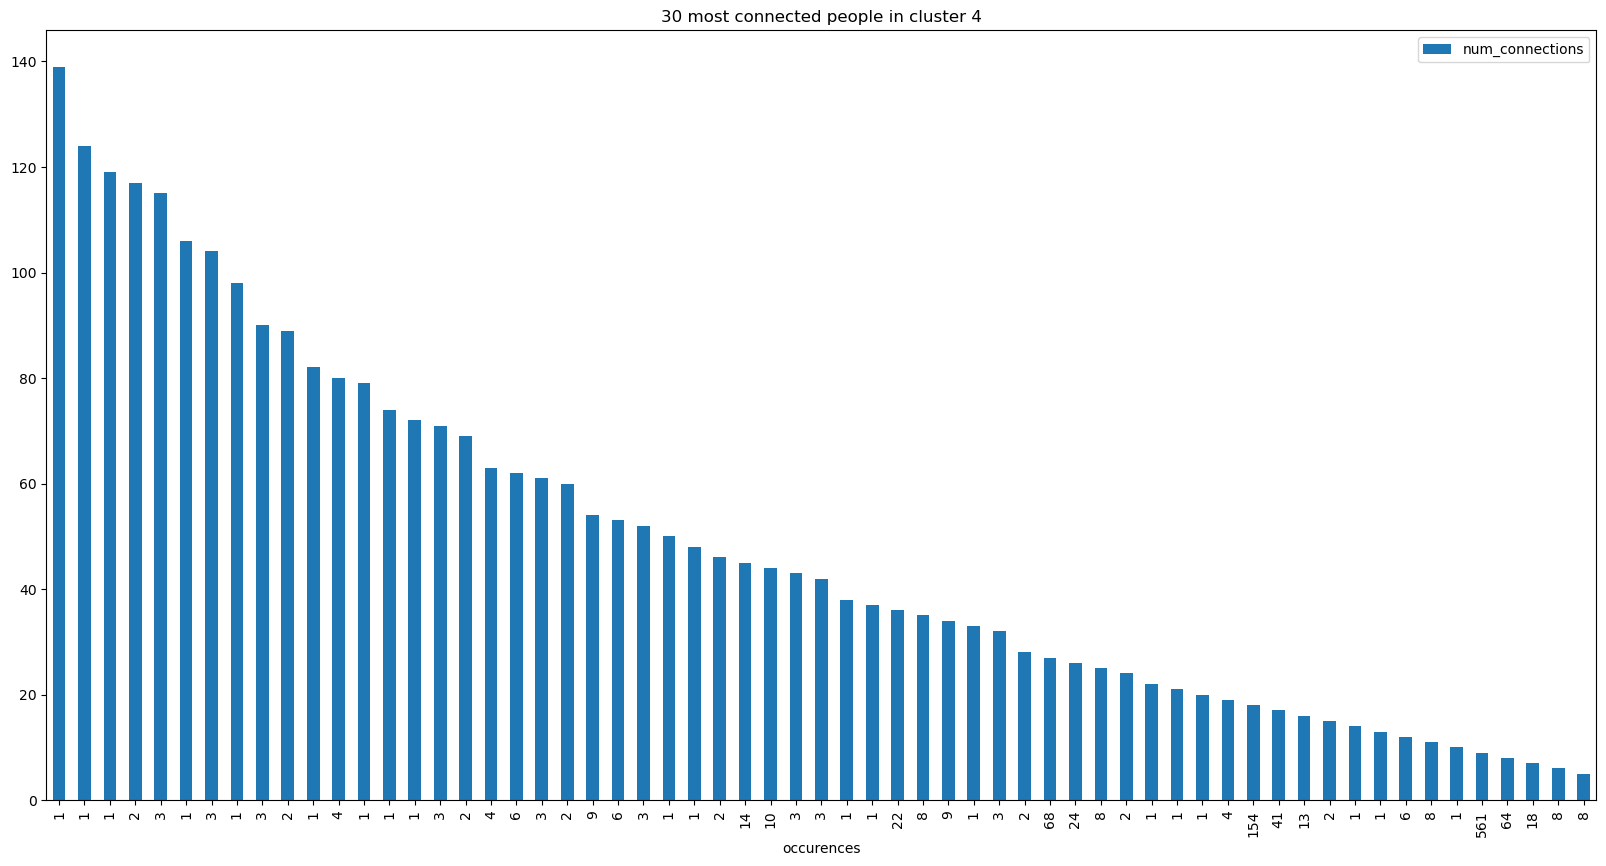

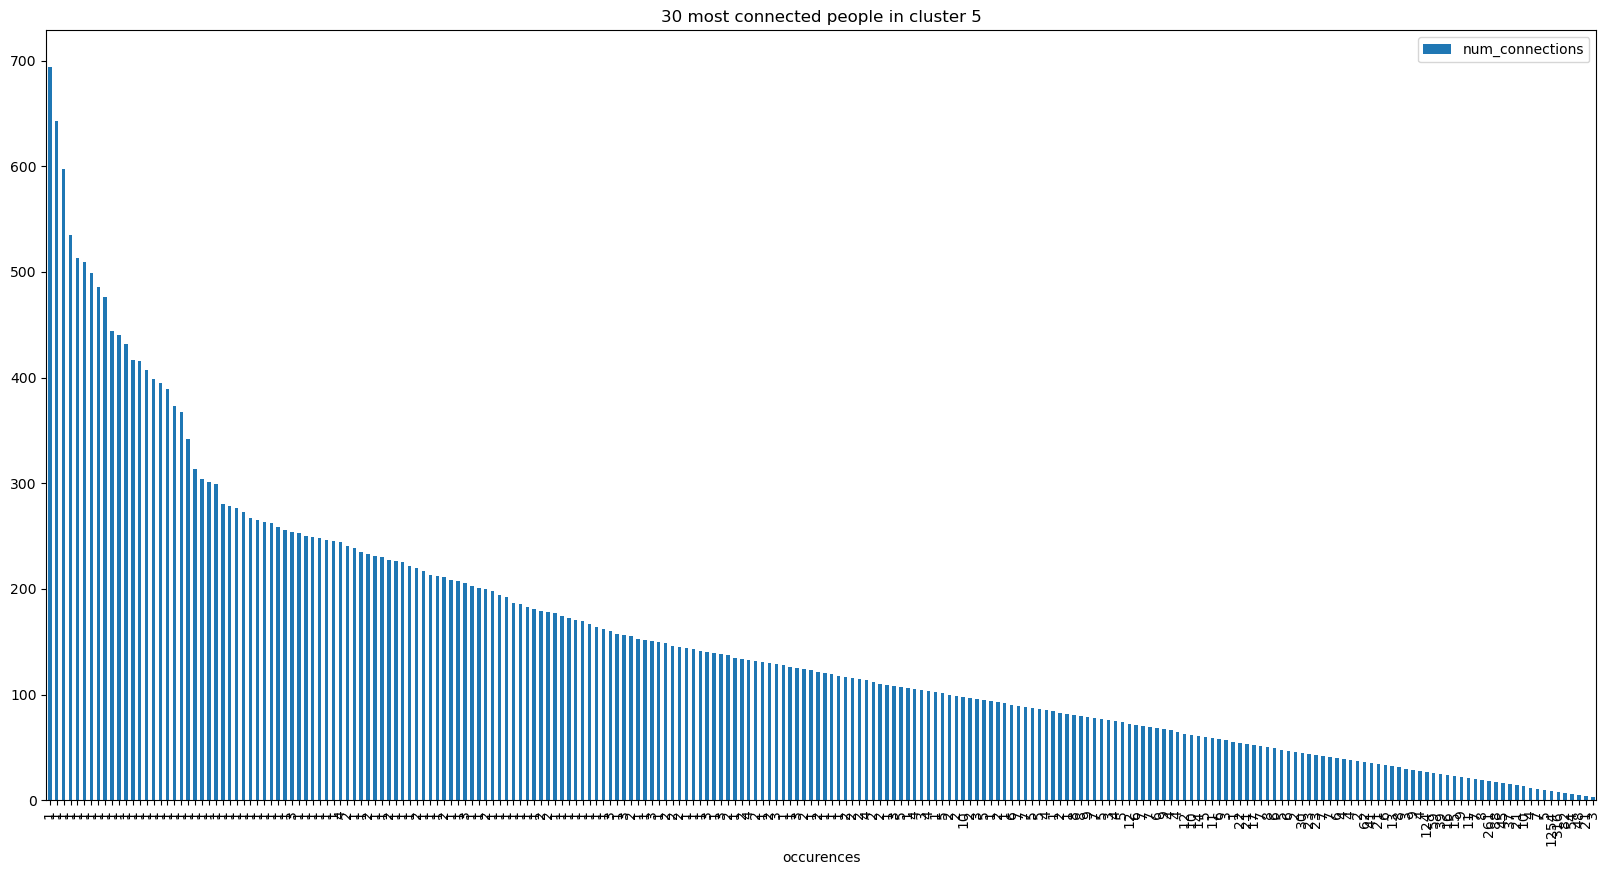

In [40]:
plot_connections((cluster1_connections, 1), (cluster2_connections, 2), (cluster3_connections, 3), (cluster4_connections, 4), (cluster5_connections, 5))

In [41]:
# %run ./eda/eda_graphs.ipynb     #this is were my function was stored
# optics_clustering(df)                

In [42]:
# Clusters node using optics
def optics_clustering(node_positions, min_samples, max_eps, xi, min_cluster_size):
    positions_array = np.array([position for position in node_positions.values()])
    clustering = OPTICS(min_samples=min_samples, max_eps=max_eps,
        xi=xi, min_cluster_size=min_cluster_size, n_jobs=10
        ).fit(positions_array)
    labels = clustering.labels_
    
    return {id:label for id, label in zip(node_positions.keys(), labels)}

In [49]:
res = optics_clustering(position, min_samples=15, max_eps=0.0029, xi=0.2, min_cluster_size=400)

In [50]:
res

{'nm0000002': 0,
 'nm0000008': 0,
 'nm0000018': 0,
 'nm0000025': 0,
 'nm0000032': 0,
 'nm0000035': 0,
 'nm0000040': 0,
 'nm0000047': 0,
 'nm0000052': 0,
 'nm0000056': 0,
 'nm0000063': 0,
 'nm0000080': 0,
 'nm0000085': 0,
 'nm0000090': 0,
 'nm0000091': 0,
 'nm0000092': 0,
 'nm0000093': 0,
 'nm0000095': 0,
 'nm0000096': 0,
 'nm0000097': 0,
 'nm0000098': 0,
 'nm0000099': 0,
 'nm0000100': 0,
 'nm0000101': 0,
 'nm0000102': 0,
 'nm0000103': 0,
 'nm0000104': 0,
 'nm0000106': 0,
 'nm0000107': 0,
 'nm0000108': 0,
 'nm0000109': 0,
 'nm0000110': 0,
 'nm0000111': 0,
 'nm0000112': 0,
 'nm0000113': 0,
 'nm0000114': 0,
 'nm0000115': 0,
 'nm0000116': 0,
 'nm0000117': 0,
 'nm0000118': 0,
 'nm0000119': 0,
 'nm0000120': 0,
 'nm0000121': 0,
 'nm0000123': 0,
 'nm0000124': 0,
 'nm0000125': 0,
 'nm0000126': 0,
 'nm0000127': 0,
 'nm0000128': 0,
 'nm0000129': 0,
 'nm0000130': 0,
 'nm0000131': 0,
 'nm0000132': 0,
 'nm0000133': 0,
 'nm0000134': 0,
 'nm0000136': 0,
 'nm0000137': 0,
 'nm0000138': 0,
 'nm0000139': 